## Data Overview

**prediksi nilai ujian tiap karakter anime** yang ada di `data-test`

## Columns

* `Nama`: Nama siswa yang terdaftar.
* `Jam_Belajar`: Jumlah waktu yang dihabiskan siswa untuk belajar setiap hari.
* `Kehadiran`: Tingkat kehadiran siswa dalam kegiatan sekolah.
* `Keterlibatan_Orangtua`: Tingkat partisipasi orangtua dalam pendidikan siswa.
* `Akses_ke_Sumber_Daya`: Ketersediaan sumber daya belajar.
* `Kegiatan_Ekstrakurikuler`: Partisipasi siswa dalam kegiatan di luar kurikulum formal.
* `Jam_Tidur`: Rata-rata jumlah jam tidur siswa per hari.
* `Nilai_Sebelumnya`: Nilai atau prestasi akademis siswa pada periode sebelumnya.
* `Tingkat_Motivasi`: Tingkat motivasi siswa dalam belajar dan mencapai tujuan akademik.
* `Akses_Internet`: Ketersediaan akses internet bagi siswa.
* `Sesi_Bimbingan`: Jumlah sesi bimbingan belajar atau les yang diikuti oleh siswa.
* `Pendapatan_Keluarga`: Tingka pendapatan keluarga siswa.
* `Kualitas_Guru`: Persepsi atau penilaian kualitas pengajaran guru yang mengajar siswa.
* `Jenis_Sekolah`: Jenis sekolah yang dihadiri siswa.
* `Pengaruh_Teman`: Seberapa besar pengaruh teman sebaya terhadap siswa.
* `Aktivitas_Fisik`: Tingkat keterlibatan siswa dalam aktivitas fisik atau olahraga.
* `Kesulitan_Belajar`: Adanya kesulitan belajar yang dialami oleh siswa, seperti disleksia atau ADHD.
* `Tingkat_Pendidikan_Orangtua`: Tingkat pendidikan tertinggi yang telah dicapai oleh orangtua siswa.
* `Jarak_dari_Rumah`: Jarak antara rumah siswa dan sekolah.
* `Nilai_Ujian`: Nilai yang diperoleh siswa dalam ujian terbaru.


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
# Menggunakan StandardScaler untuk standardisasi


In [70]:
df = pd.read_csv('train.csv')
df_test_predict = pd.read_csv('test.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nama                         6378 non-null   object 
 1   Jam_Belajar                  5424 non-null   float64
 2   Kehadiran                    5791 non-null   float64
 3   Keterlibatan_Orangtua        6030 non-null   object 
 4   Akses_ke_Sumber_Daya         6254 non-null   object 
 5   Kegiatan_Ekstrakurikuler     6378 non-null   object 
 6   Jam_Tidur                    6104 non-null   float64
 7   Nilai_Sebelumnya             3764 non-null   float64
 8   Tingkat_Motivasi             6378 non-null   object 
 9   Akses_Internet               6324 non-null   object 
 10  Sesi_Bimbingan               6378 non-null   int64  
 11  Pendapatan_Keluarga          4274 non-null   object 
 12  Kualitas_Guru                5537 non-null   object 
 13  Jenis_Sekolah     

In [72]:
df.head()

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Nilai_Ujian
0,Elner,NaN,84.0,Low,High,No,7.0,NaN,Low,Yes,0,NaN,Medium,Public,Positive,3,No,High School,Near,67
1,Male Staff,19.0,NaN,Low,Medium,No,8.0,NaN,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,61
2,Bangai ROGIRI,24.0,98.0,Medium,Medium,Yes,7.0,NaN,Medium,Yes,2,NaN,Medium,Public,Neutral,4,No,Postgraduate,Near,74
3,Pakkun,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,71
4,Cole MOZELEEMAY,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,70


In [73]:
df.tail()

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Nilai_Ujian
6373,Akama,25.0,69.0,High,Medium,No,7.0,NaN,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,68
6374,Mitsuko SAKAI,23.0,76.0,High,Medium,No,8.0,81.0,Medium,Yes,3,NaN,High,Public,Positive,2,No,High School,Near,69
6375,Chen Ting,20.0,90.0,Medium,Low,Yes,6.0,NaN,Low,Yes,3,NaN,Medium,Public,Negative,2,No,Postgraduate,Near,68
6376,Christhald BALZ,10.0,86.0,High,High,Yes,6.0,NaN,High,Yes,2,Low,Medium,Private,Positive,3,NaN,High School,Far,68
6377,Fortune's Director,15.0,67.0,Medium,Low,Yes,9.0,94.0,Medium,Yes,0,NaN,Medium,Public,Positive,4,No,Postgraduate,Near,64


In [74]:
df.nunique()

Nama                           6378
Jam_Belajar                      40
Kehadiran                        41
Keterlibatan_Orangtua             3
Akses_ke_Sumber_Daya              3
Kegiatan_Ekstrakurikuler          2
Jam_Tidur                         7
Nilai_Sebelumnya                 51
Tingkat_Motivasi                  3
Akses_Internet                    2
Sesi_Bimbingan                    9
Pendapatan_Keluarga               3
Kualitas_Guru                     3
Jenis_Sekolah                     2
Pengaruh_Teman                    3
Aktivitas_Fisik                   7
Kesulitan_Belajar                 2
Tingkat_Pendidikan_Orangtua       3
Jarak_dari_Rumah                  3
Nilai_Ujian                      45
dtype: int64

In [75]:
df.isna().sum()

Nama                              0
Jam_Belajar                     954
Kehadiran                       587
Keterlibatan_Orangtua           348
Akses_ke_Sumber_Daya            124
Kegiatan_Ekstrakurikuler          0
Jam_Tidur                       274
Nilai_Sebelumnya               2614
Tingkat_Motivasi                  0
Akses_Internet                   54
Sesi_Bimbingan                    0
Pendapatan_Keluarga            2104
Kualitas_Guru                   841
Jenis_Sekolah                     0
Pengaruh_Teman                    0
Aktivitas_Fisik                   0
Kesulitan_Belajar               786
Tingkat_Pendidikan_Orangtua     119
Jarak_dari_Rumah                  0
Nilai_Ujian                       0
dtype: int64

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Jam_Belajar,5424.0,19.994100,5.988276,1.0,16.0,20.0,24.0,44.0
Kehadiran,5791.0,80.006217,11.590269,60.0,70.0,80.0,90.0,100.0
Jam_Tidur,6104.0,7.030963,1.467388,4.0,6.0,7.0,8.0,10.0
Nilai_Sebelumnya,3764.0,75.172423,14.416686,50.0,63.0,75.0,88.0,100.0
Sesi_Bimbingan,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Aktivitas_Fisik,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Nilai_Ujian,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


### Exploratory Data Analytics (EDA)

In [77]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Nama', 'Keterlibatan_Orangtua', 'Akses_ke_Sumber_Daya', 'Kegiatan_Ekstrakurikuler', 'Tingkat_Motivasi', 'Akses_Internet', 'Pendapatan_Keluarga', 'Kualitas_Guru', 'Jenis_Sekolah', 'Pengaruh_Teman', 'Kesulitan_Belajar', 'Tingkat_Pendidikan_Orangtua', 'Jarak_dari_Rumah']
Numerical Variables:
['Jam_Belajar', 'Kehadiran', 'Jam_Tidur', 'Nilai_Sebelumnya', 'Sesi_Bimbingan', 'Aktivitas_Fisik', 'Nilai_Ujian']


Jam_Belajar
Skew : 0.0


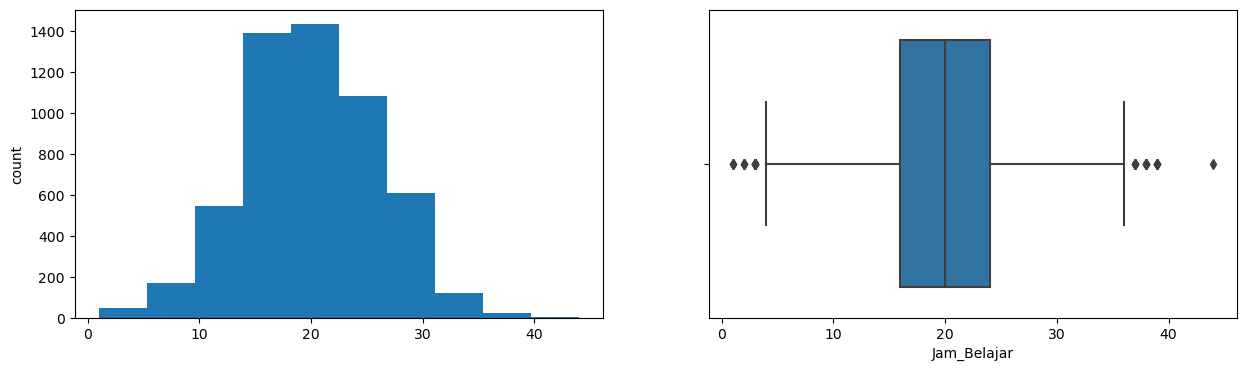

Kehadiran
Skew : 0.01


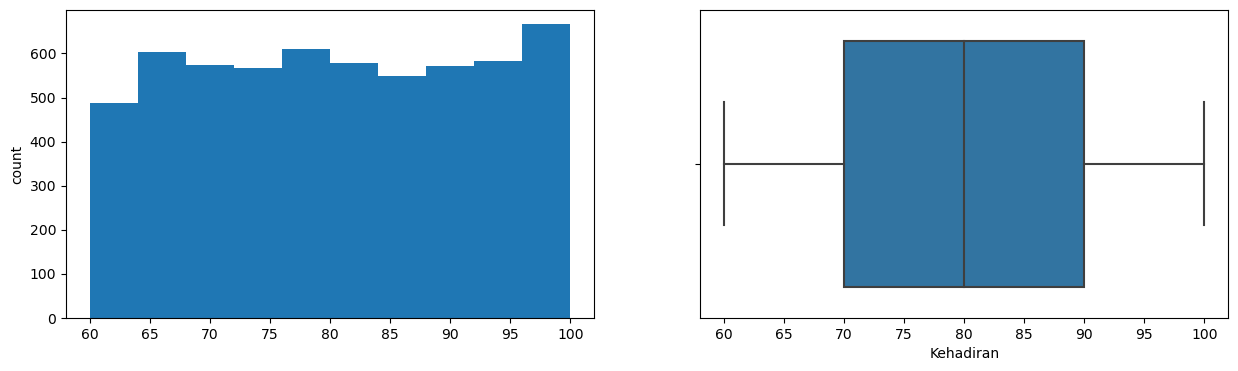

Jam_Tidur
Skew : -0.02


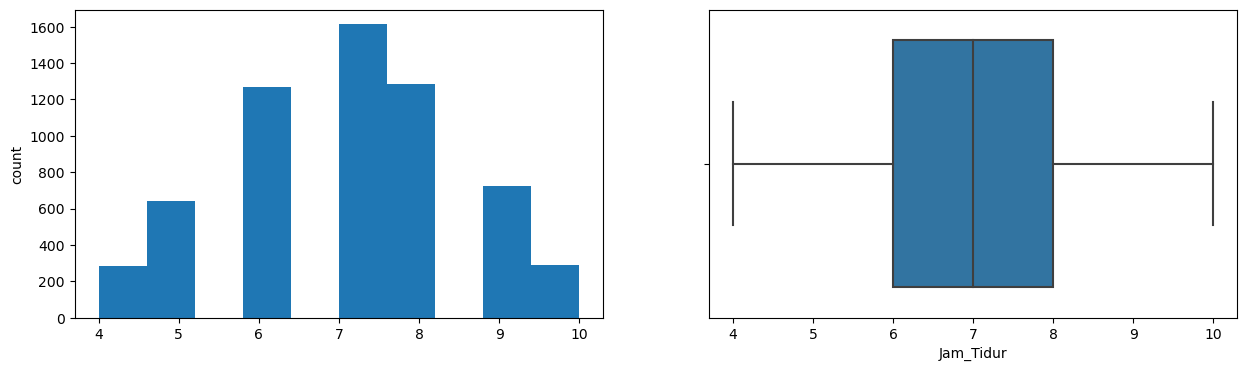

Nilai_Sebelumnya
Skew : 0.0


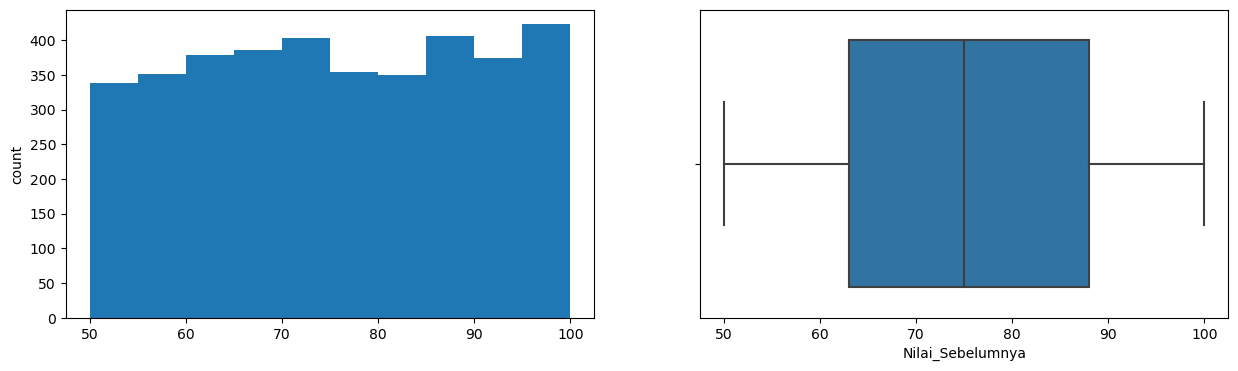

Sesi_Bimbingan
Skew : 0.83


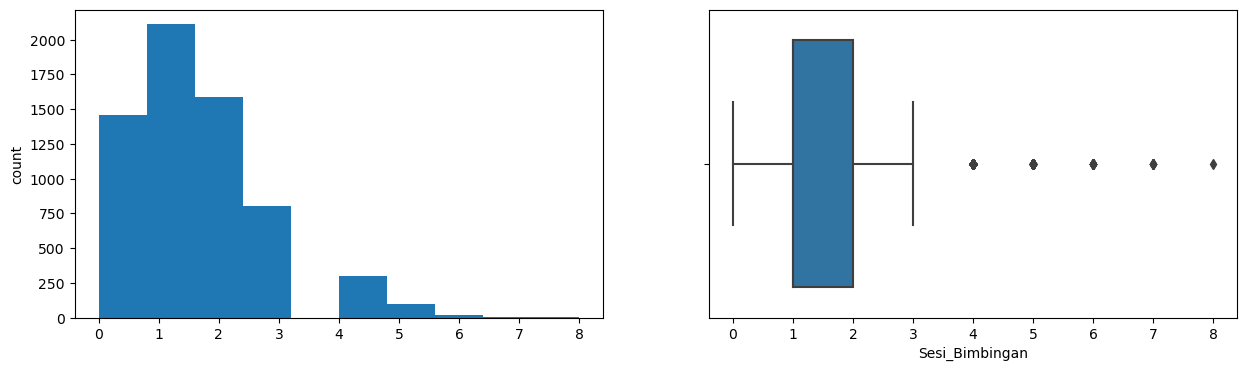

Aktivitas_Fisik
Skew : -0.04


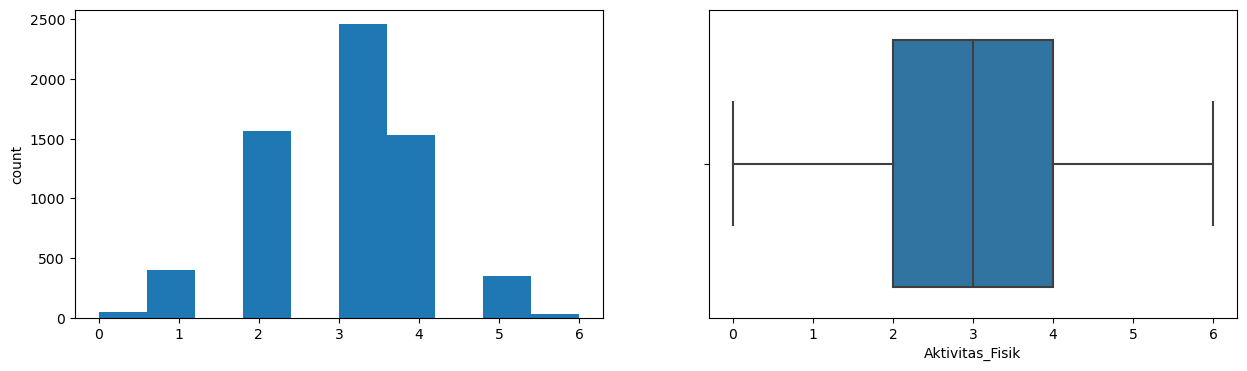

Nilai_Ujian
Skew : 1.67


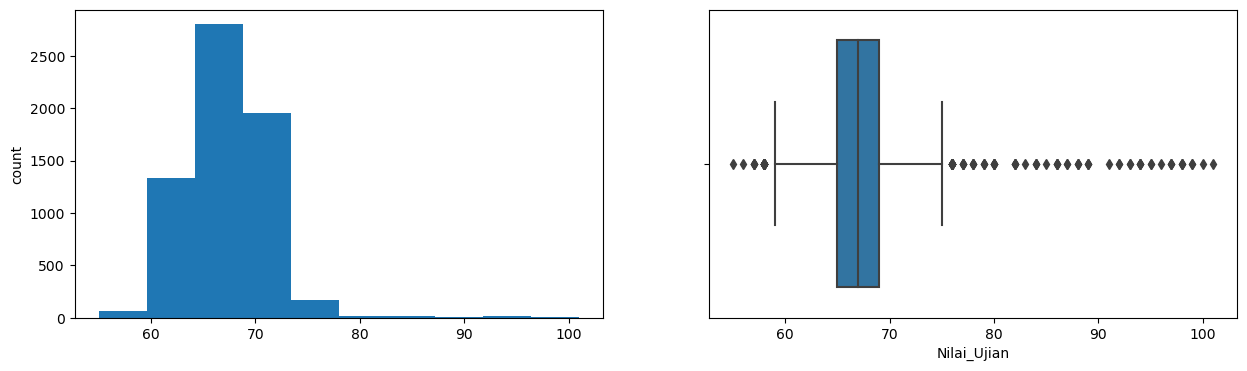

In [78]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

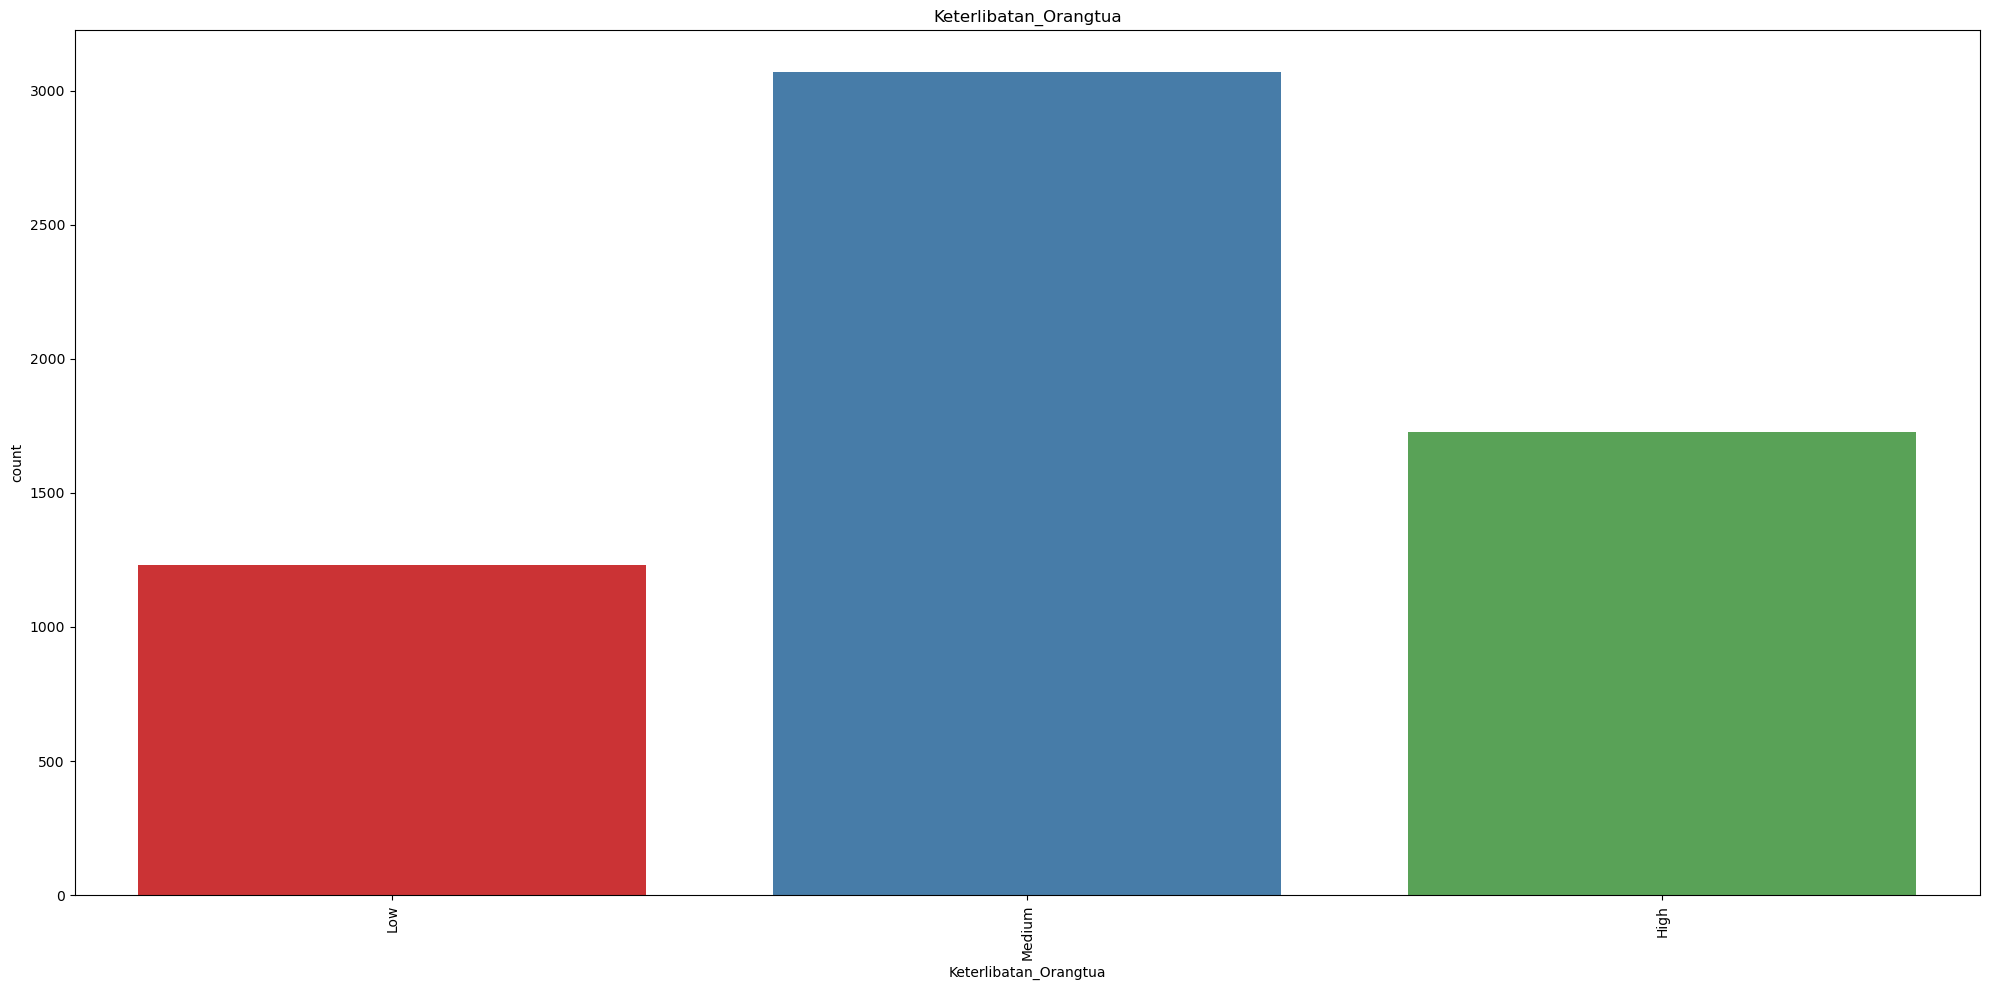

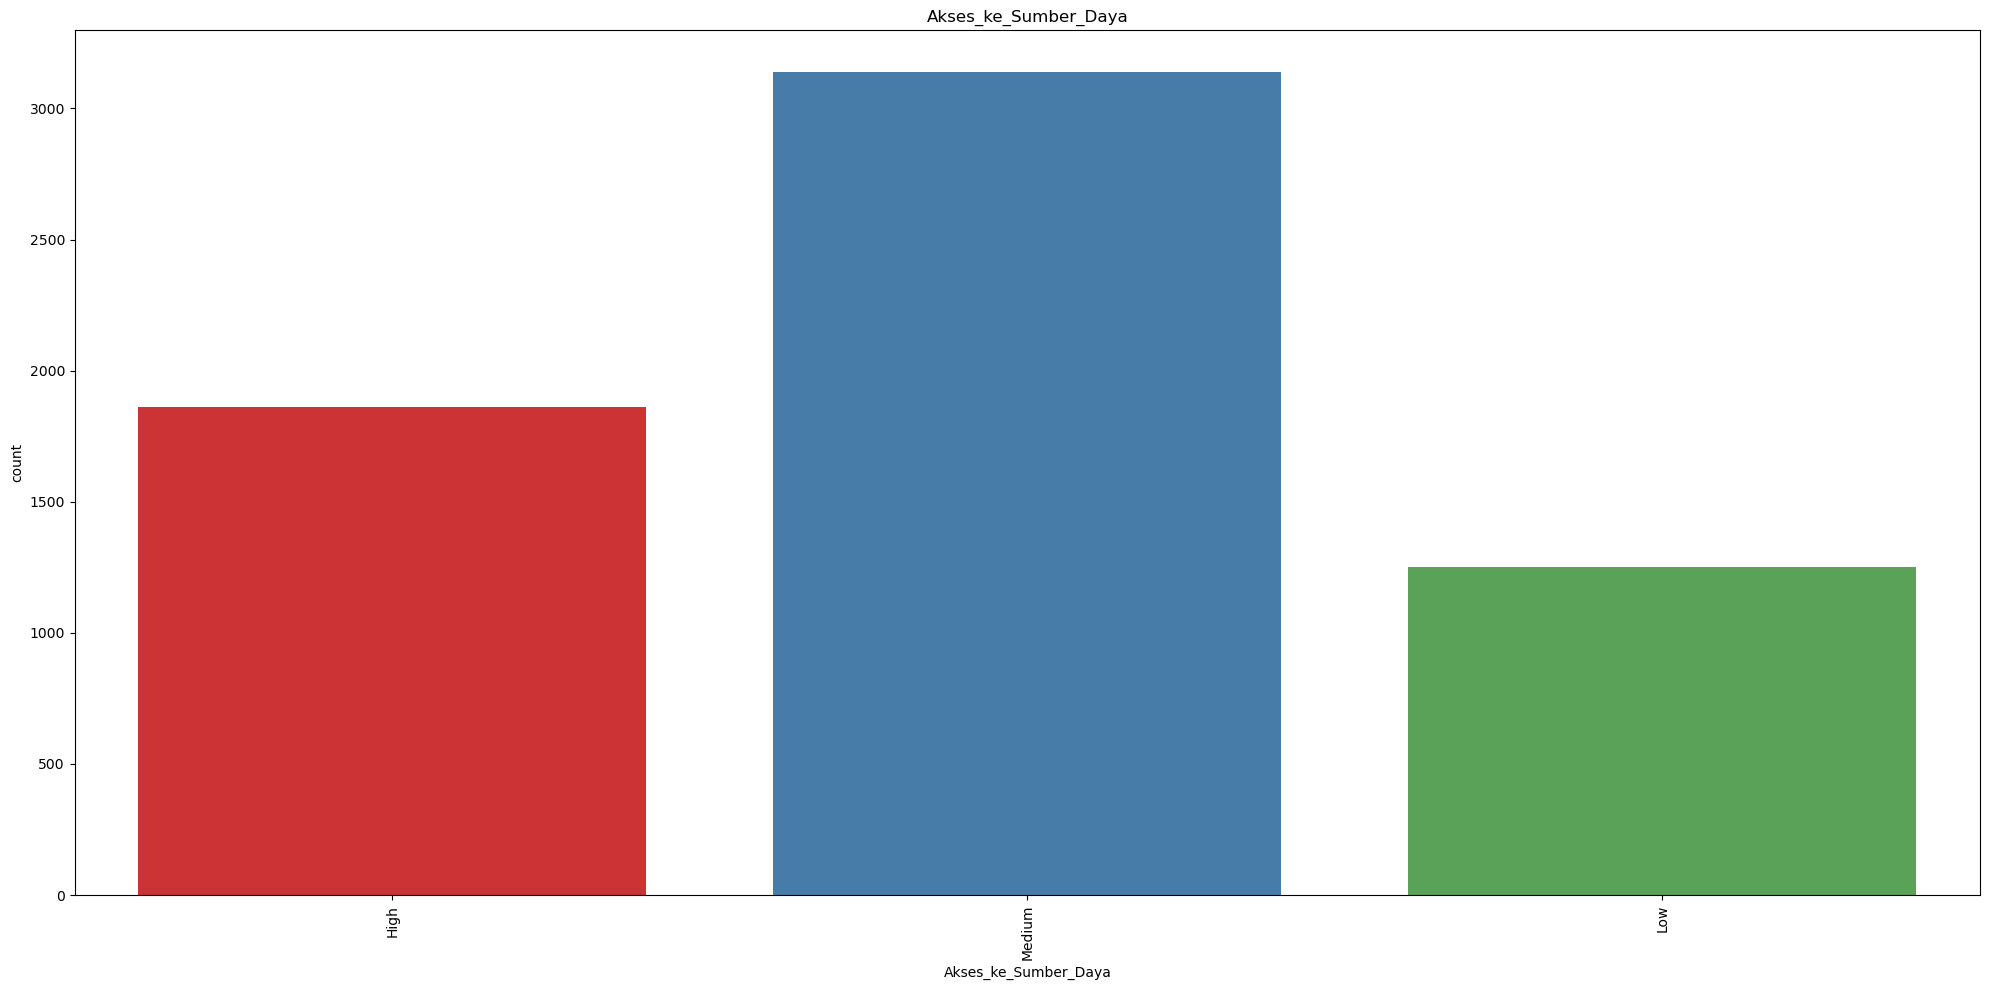

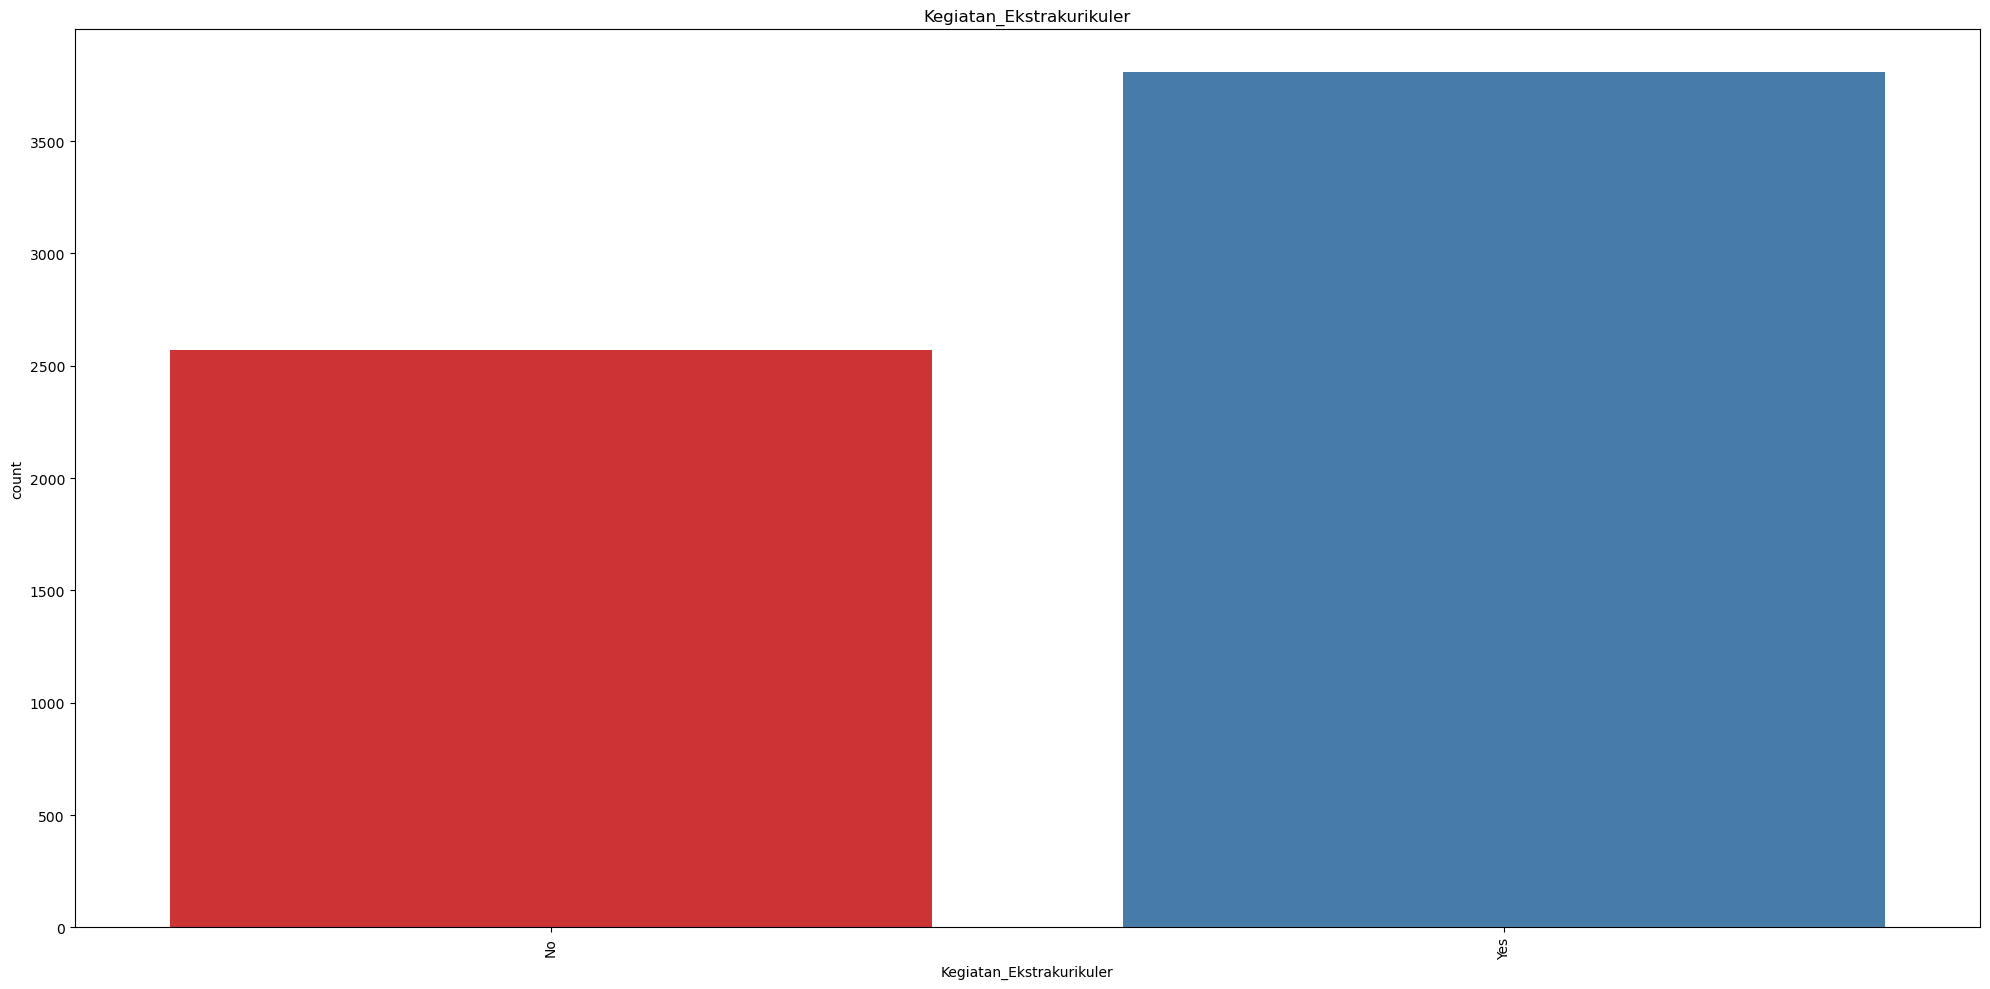

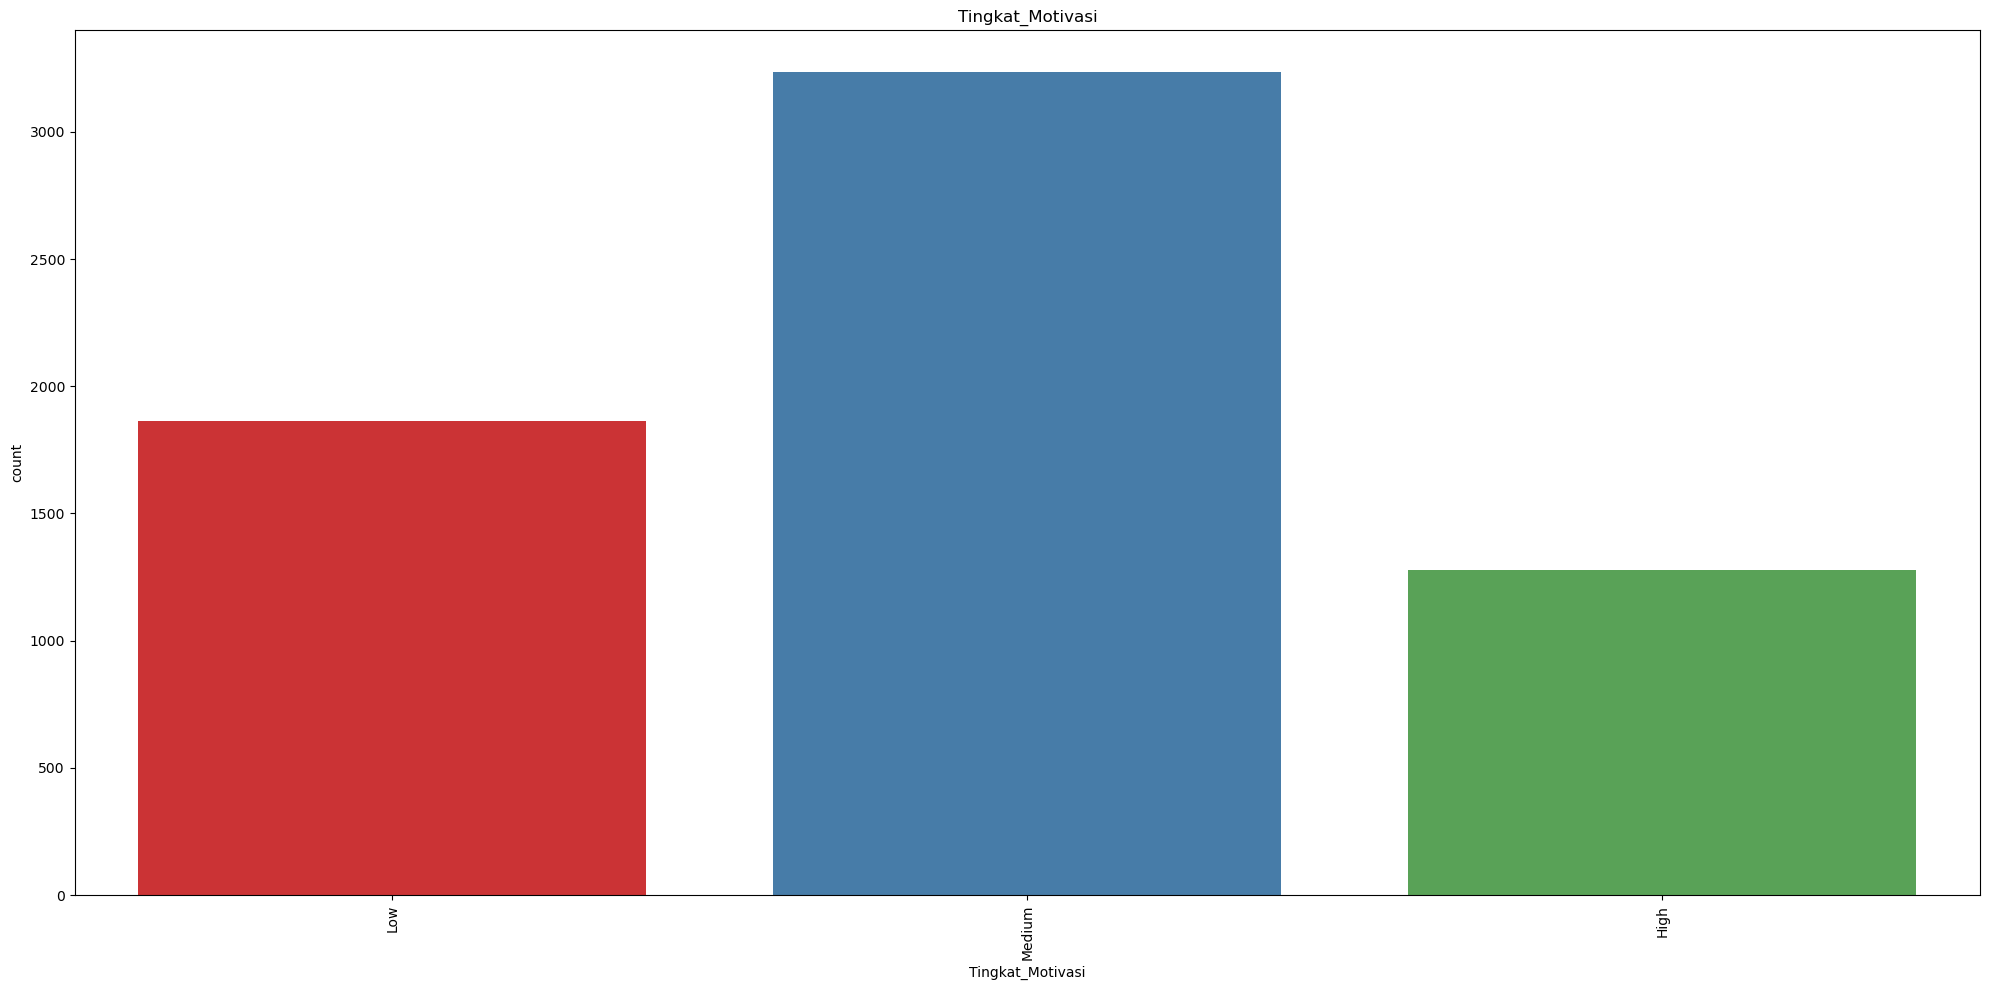

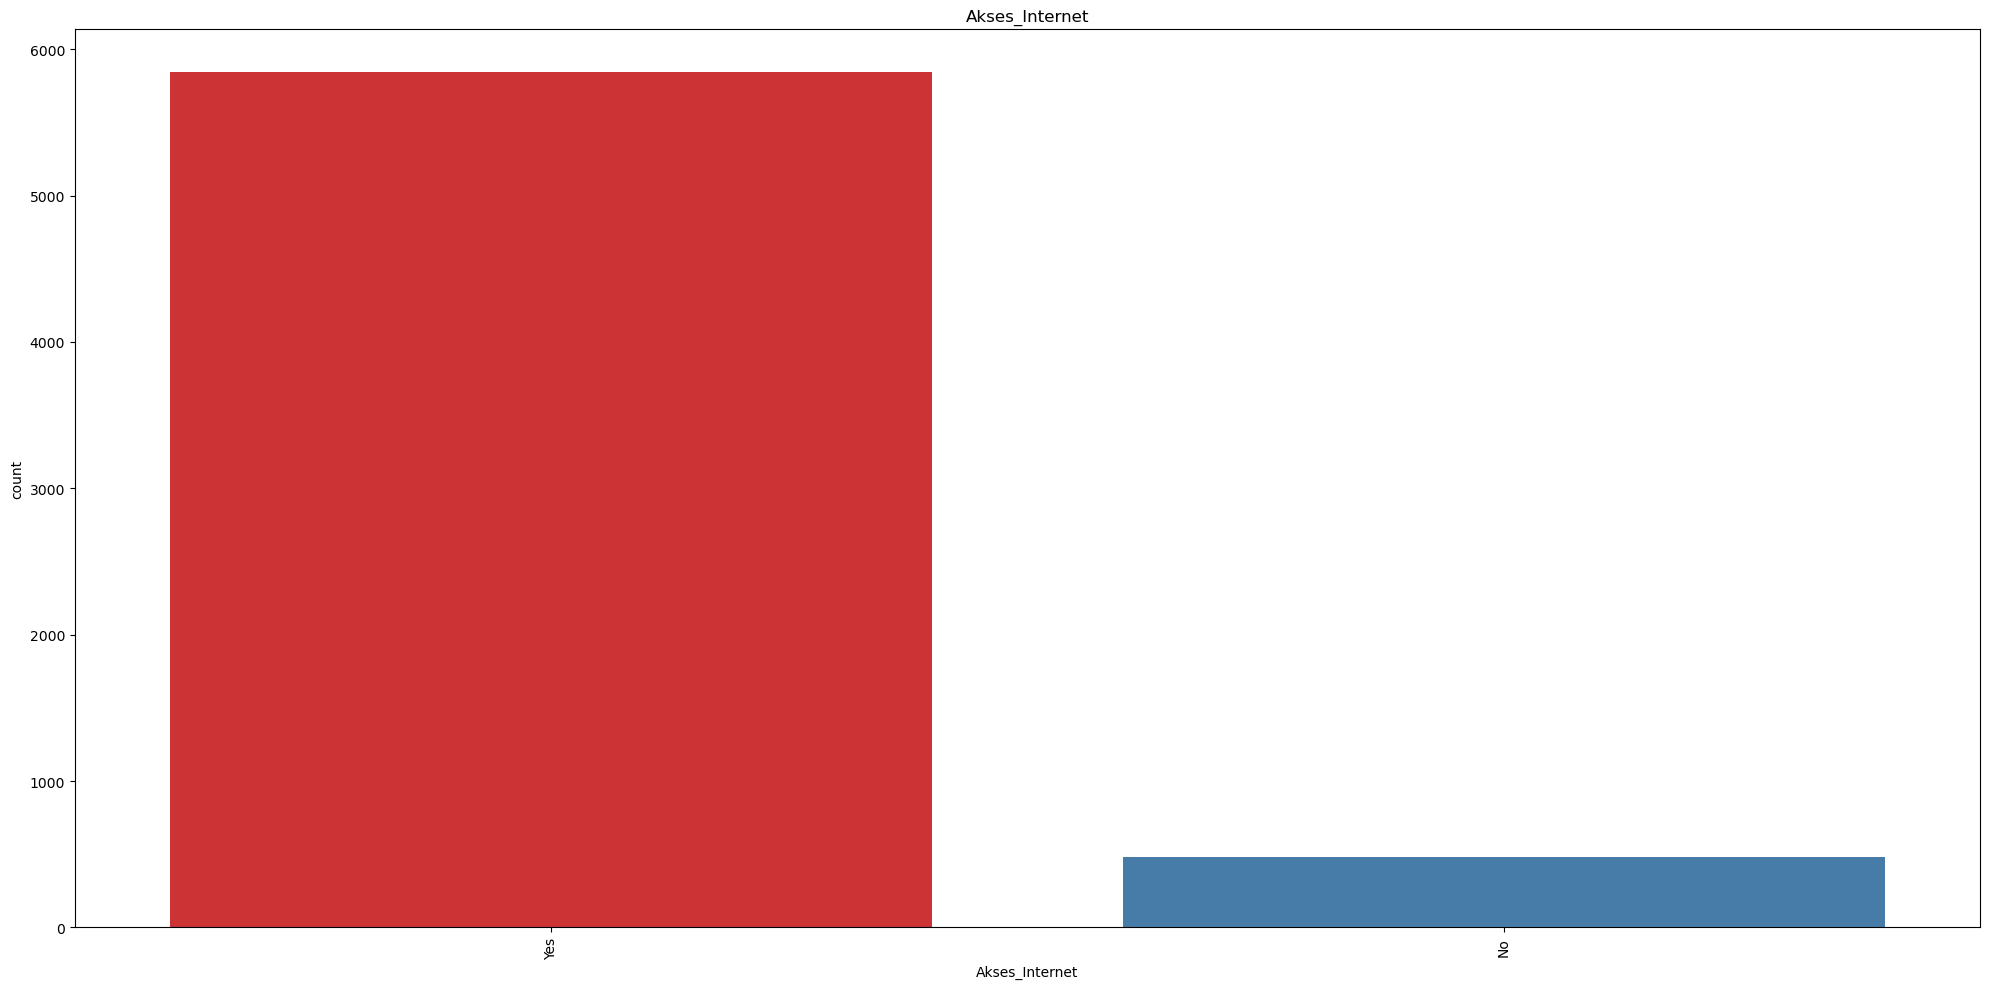

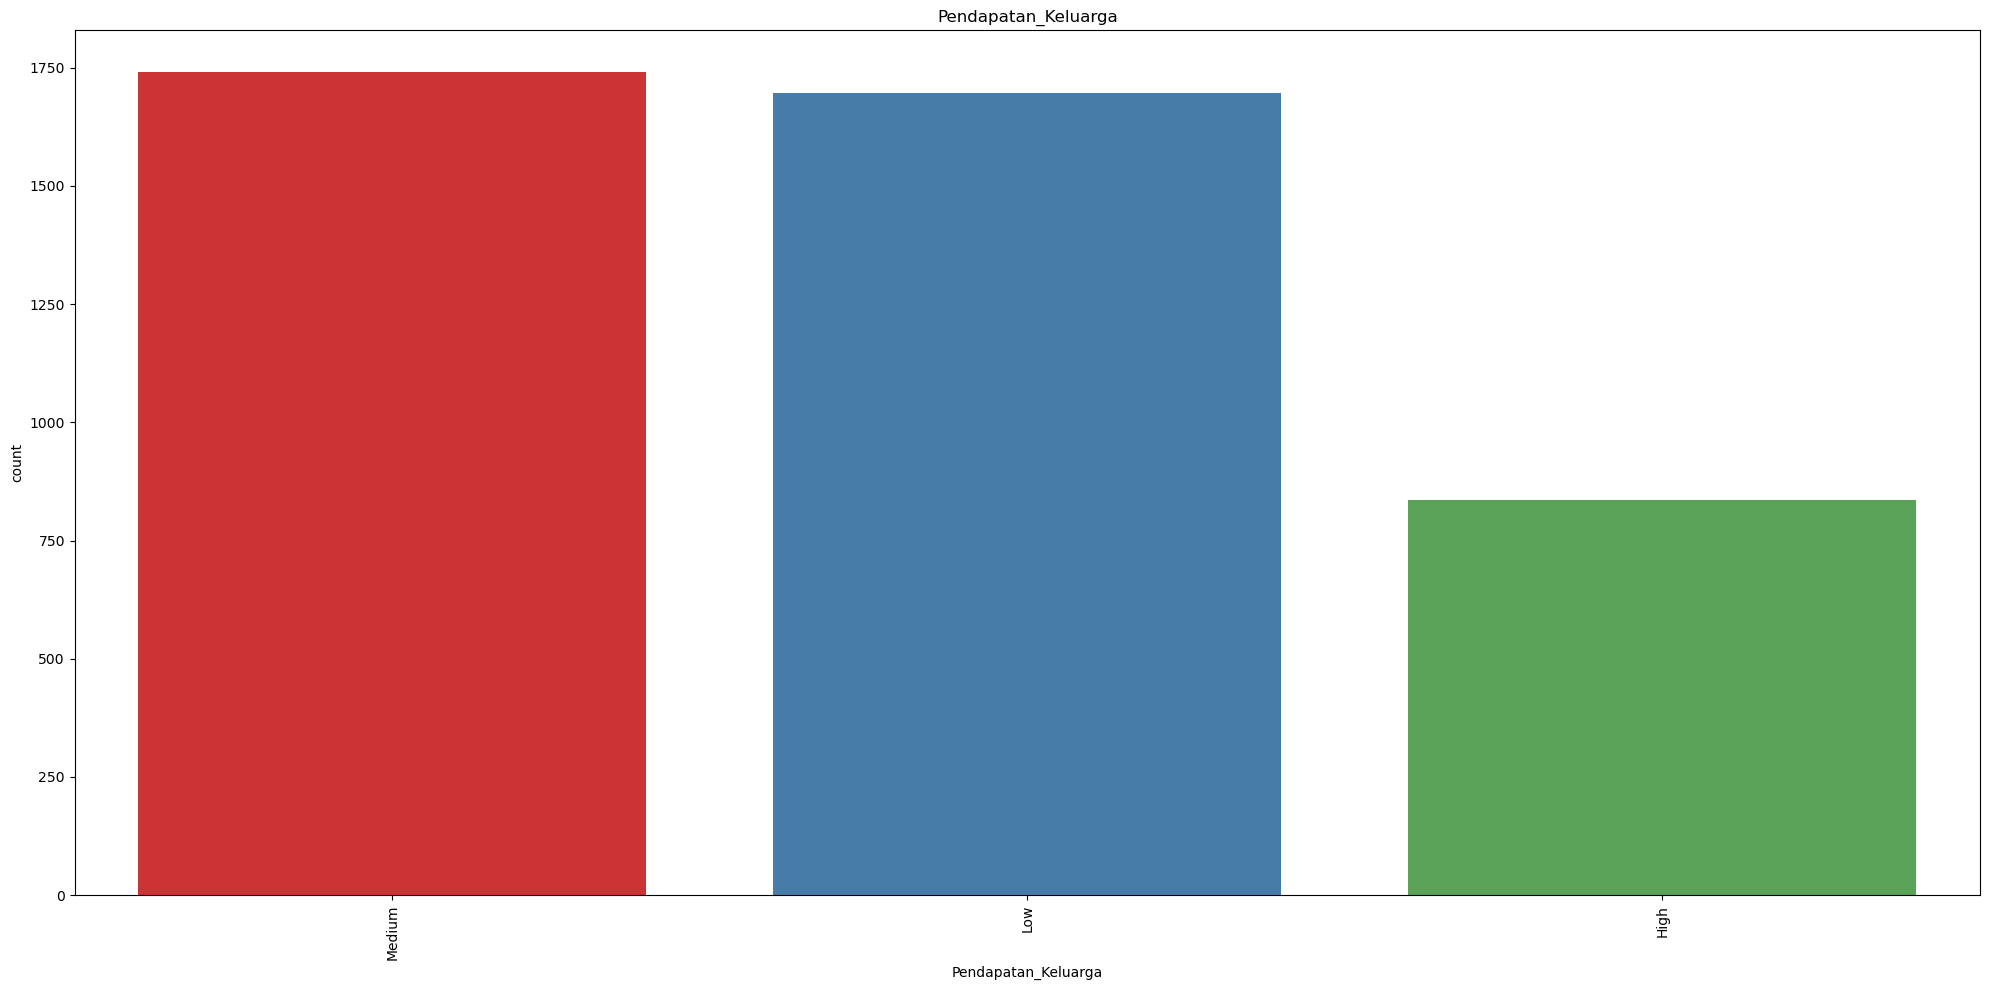

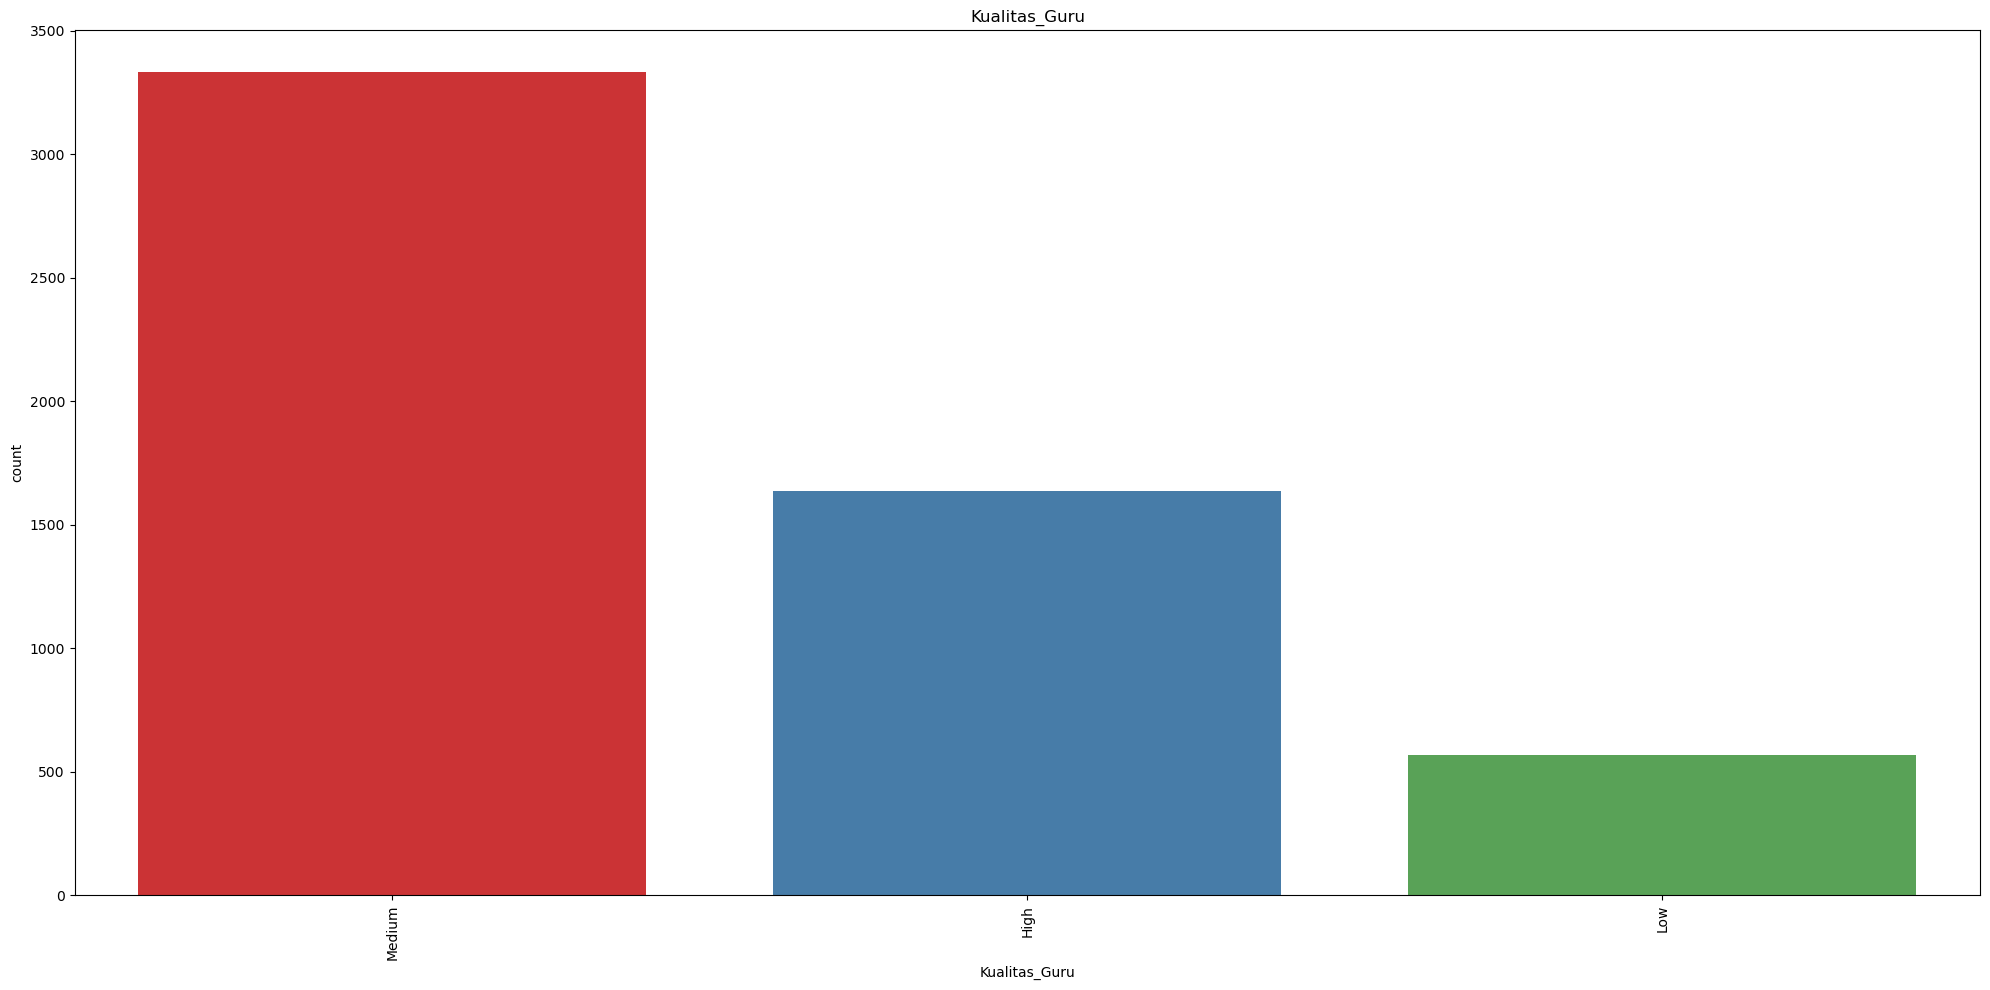

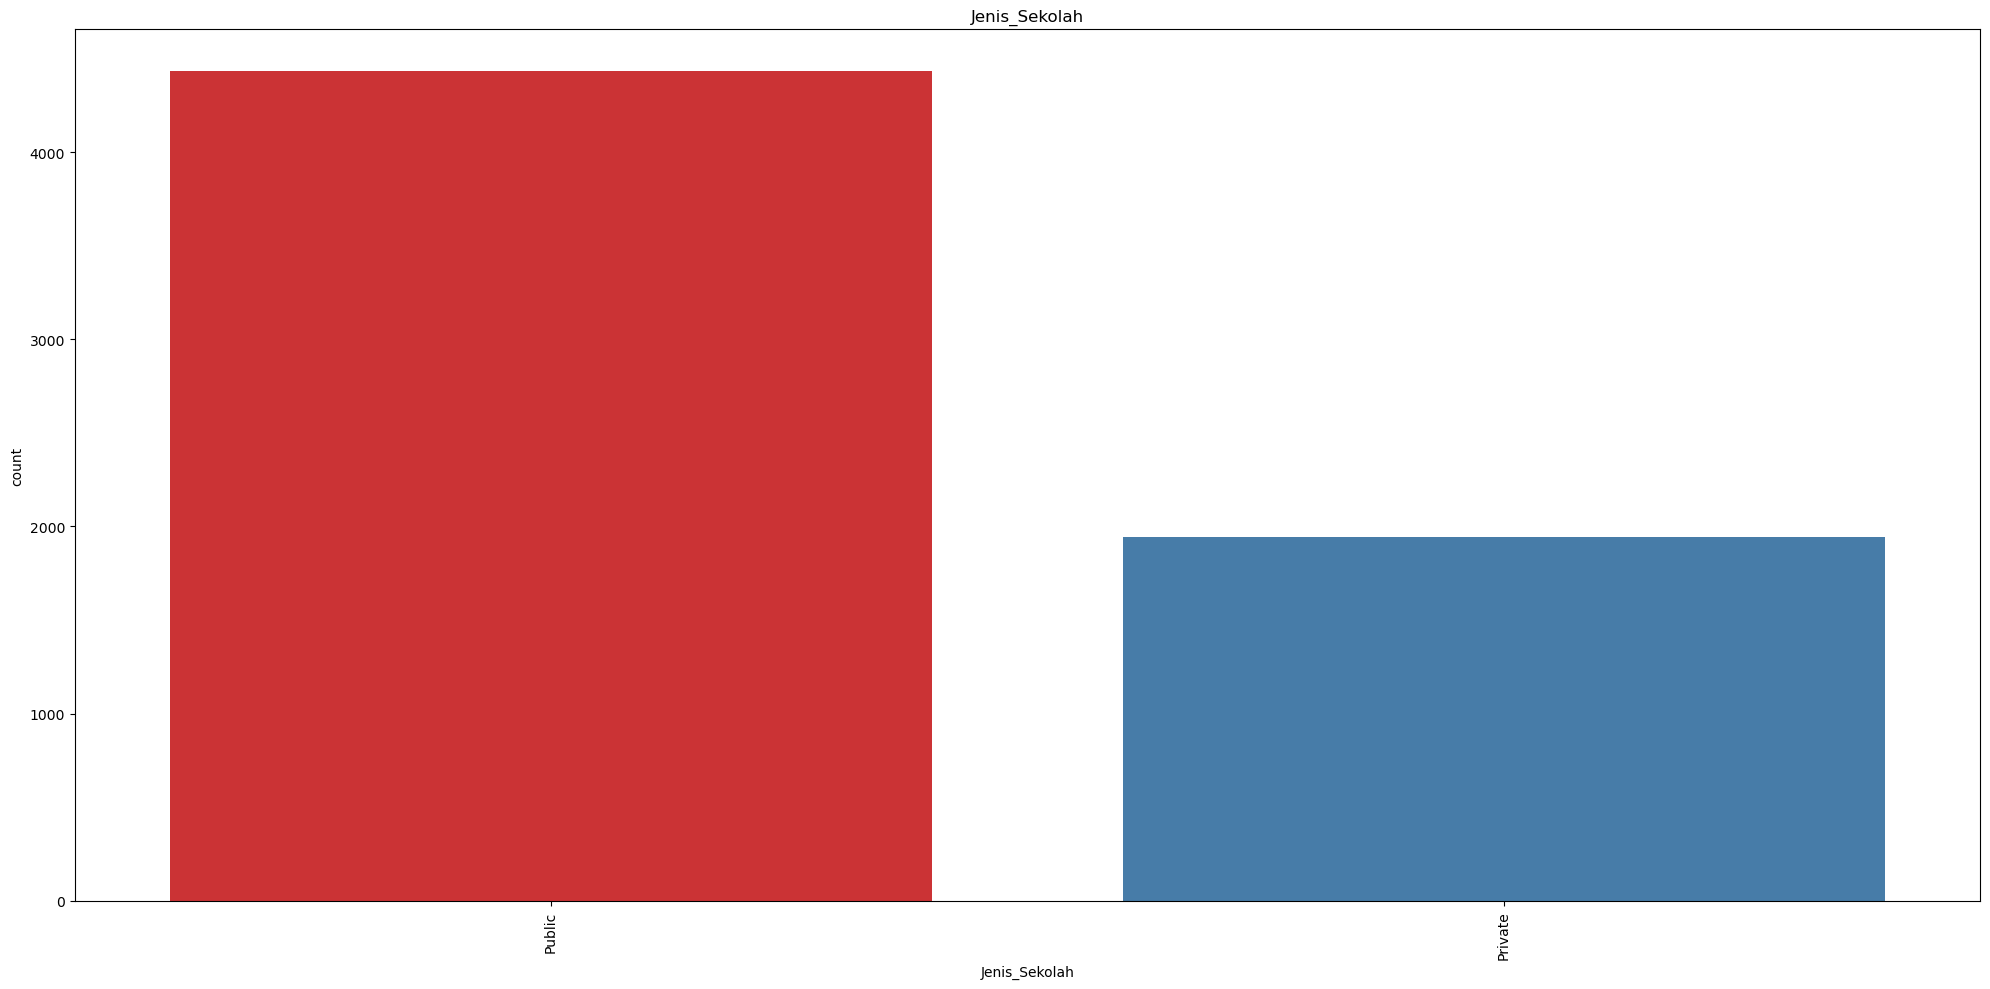

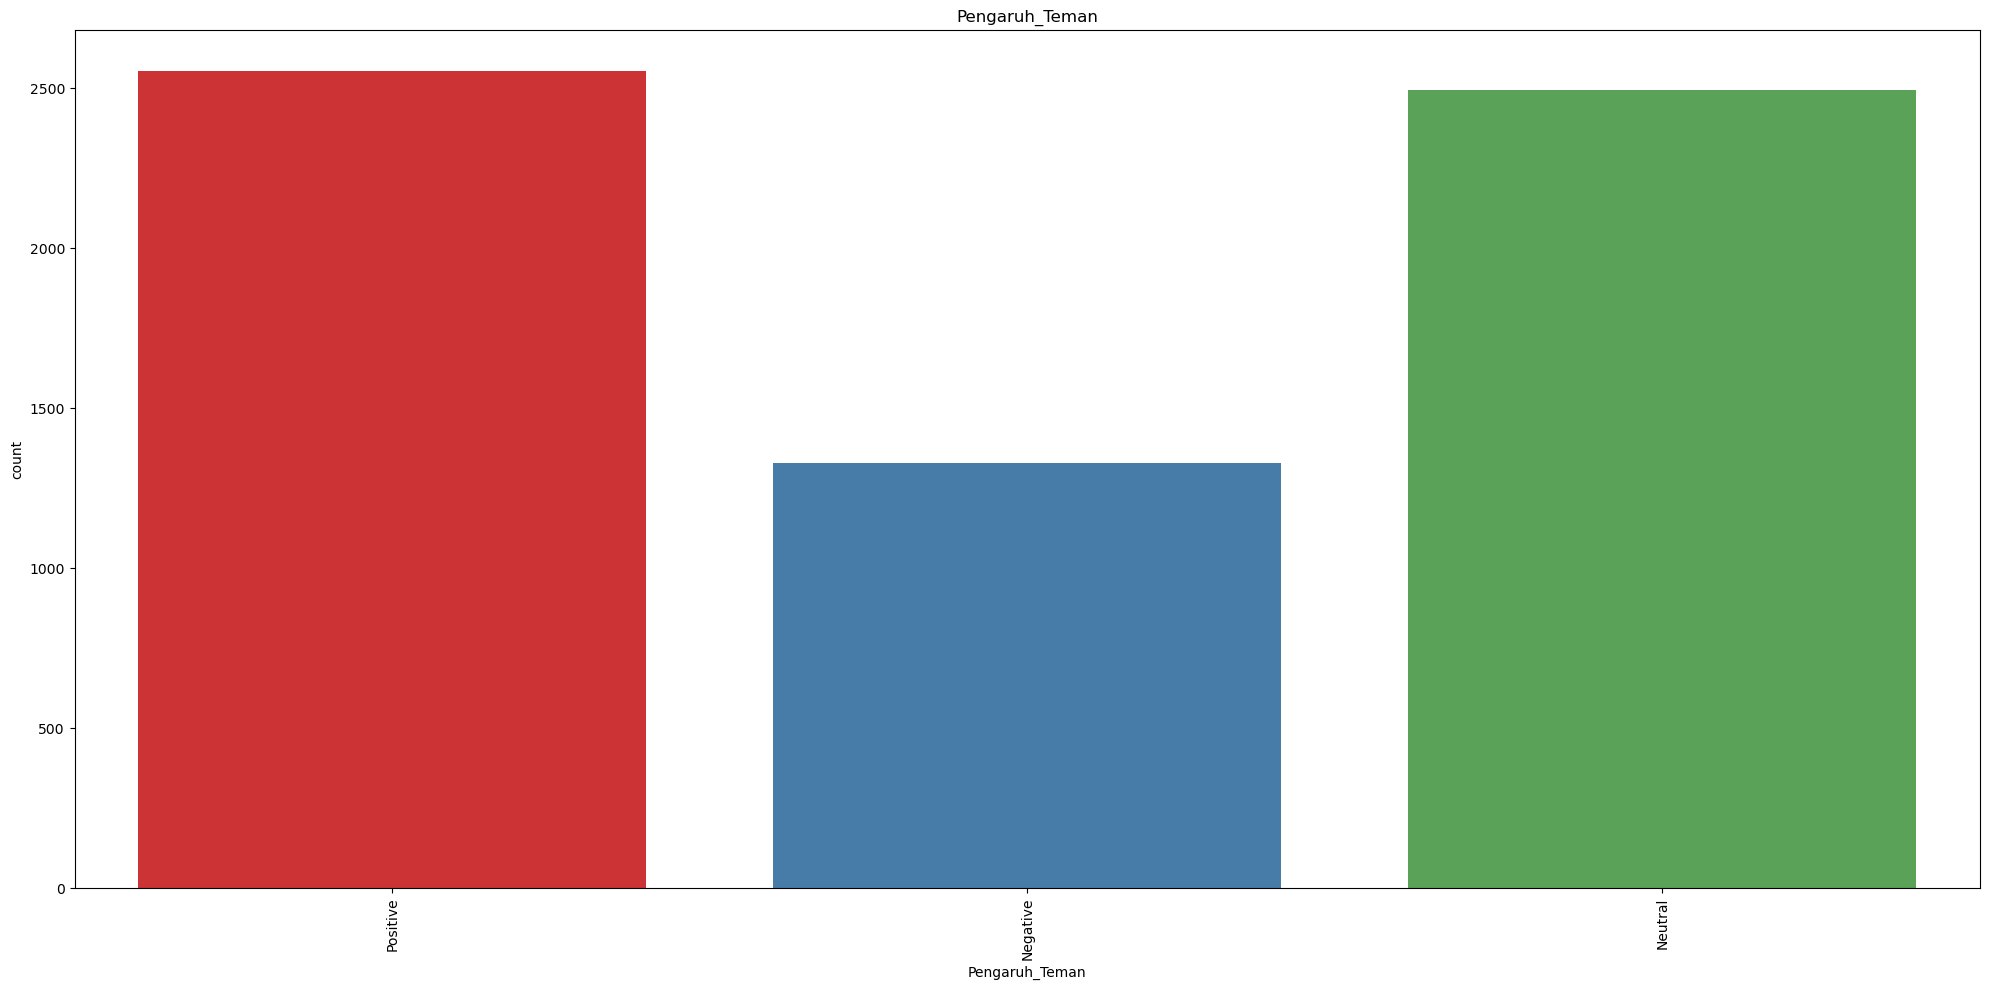

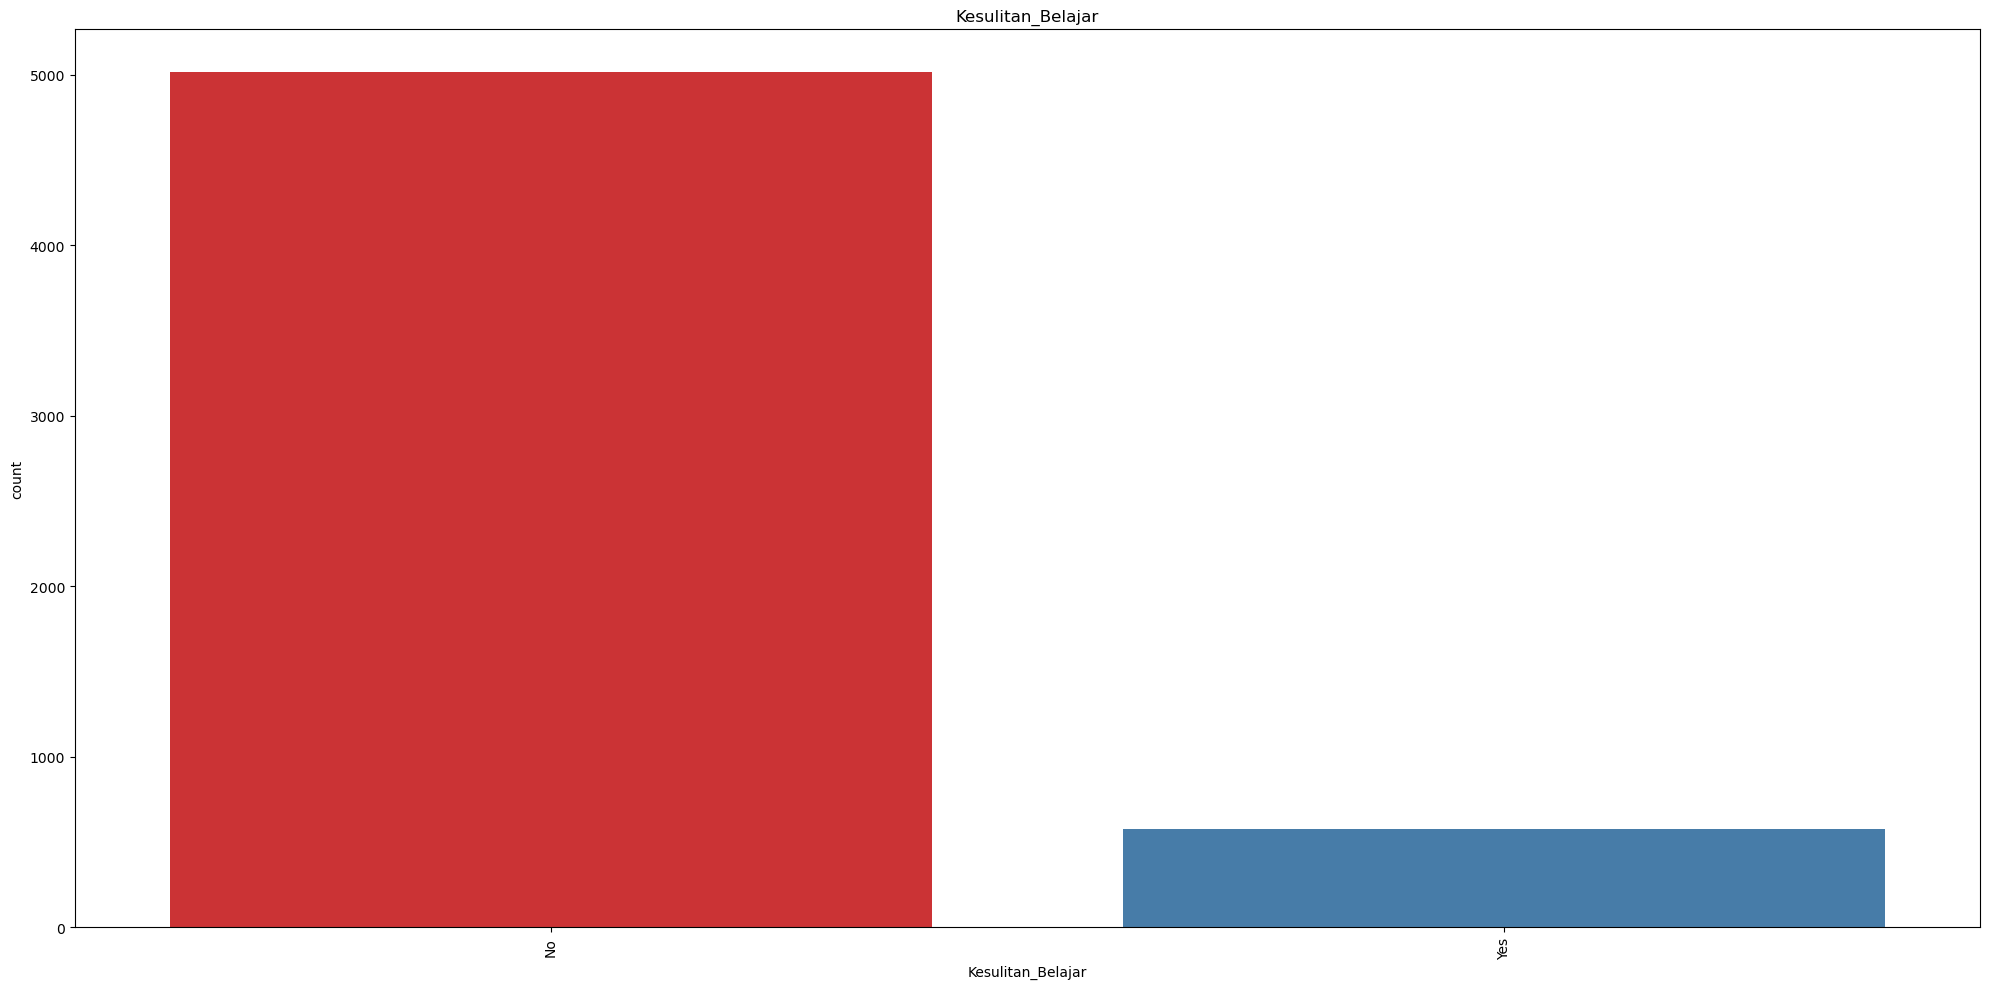

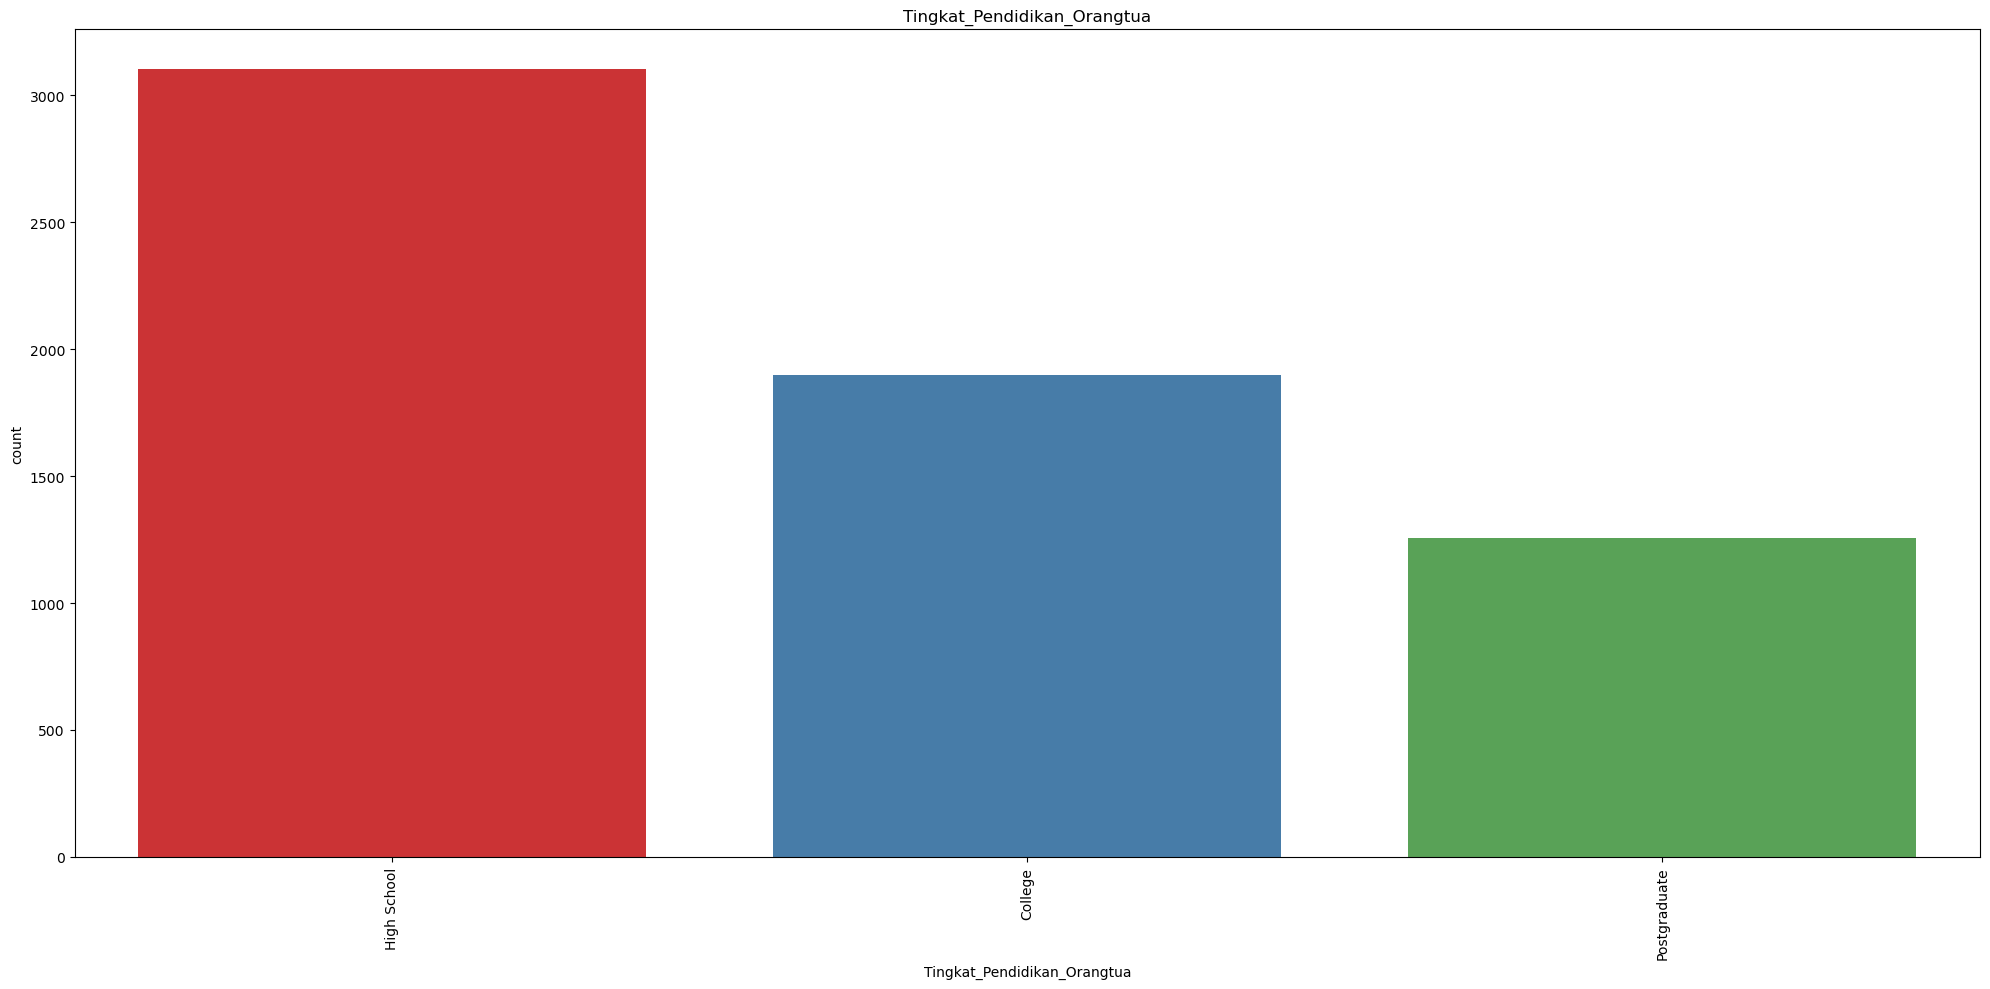

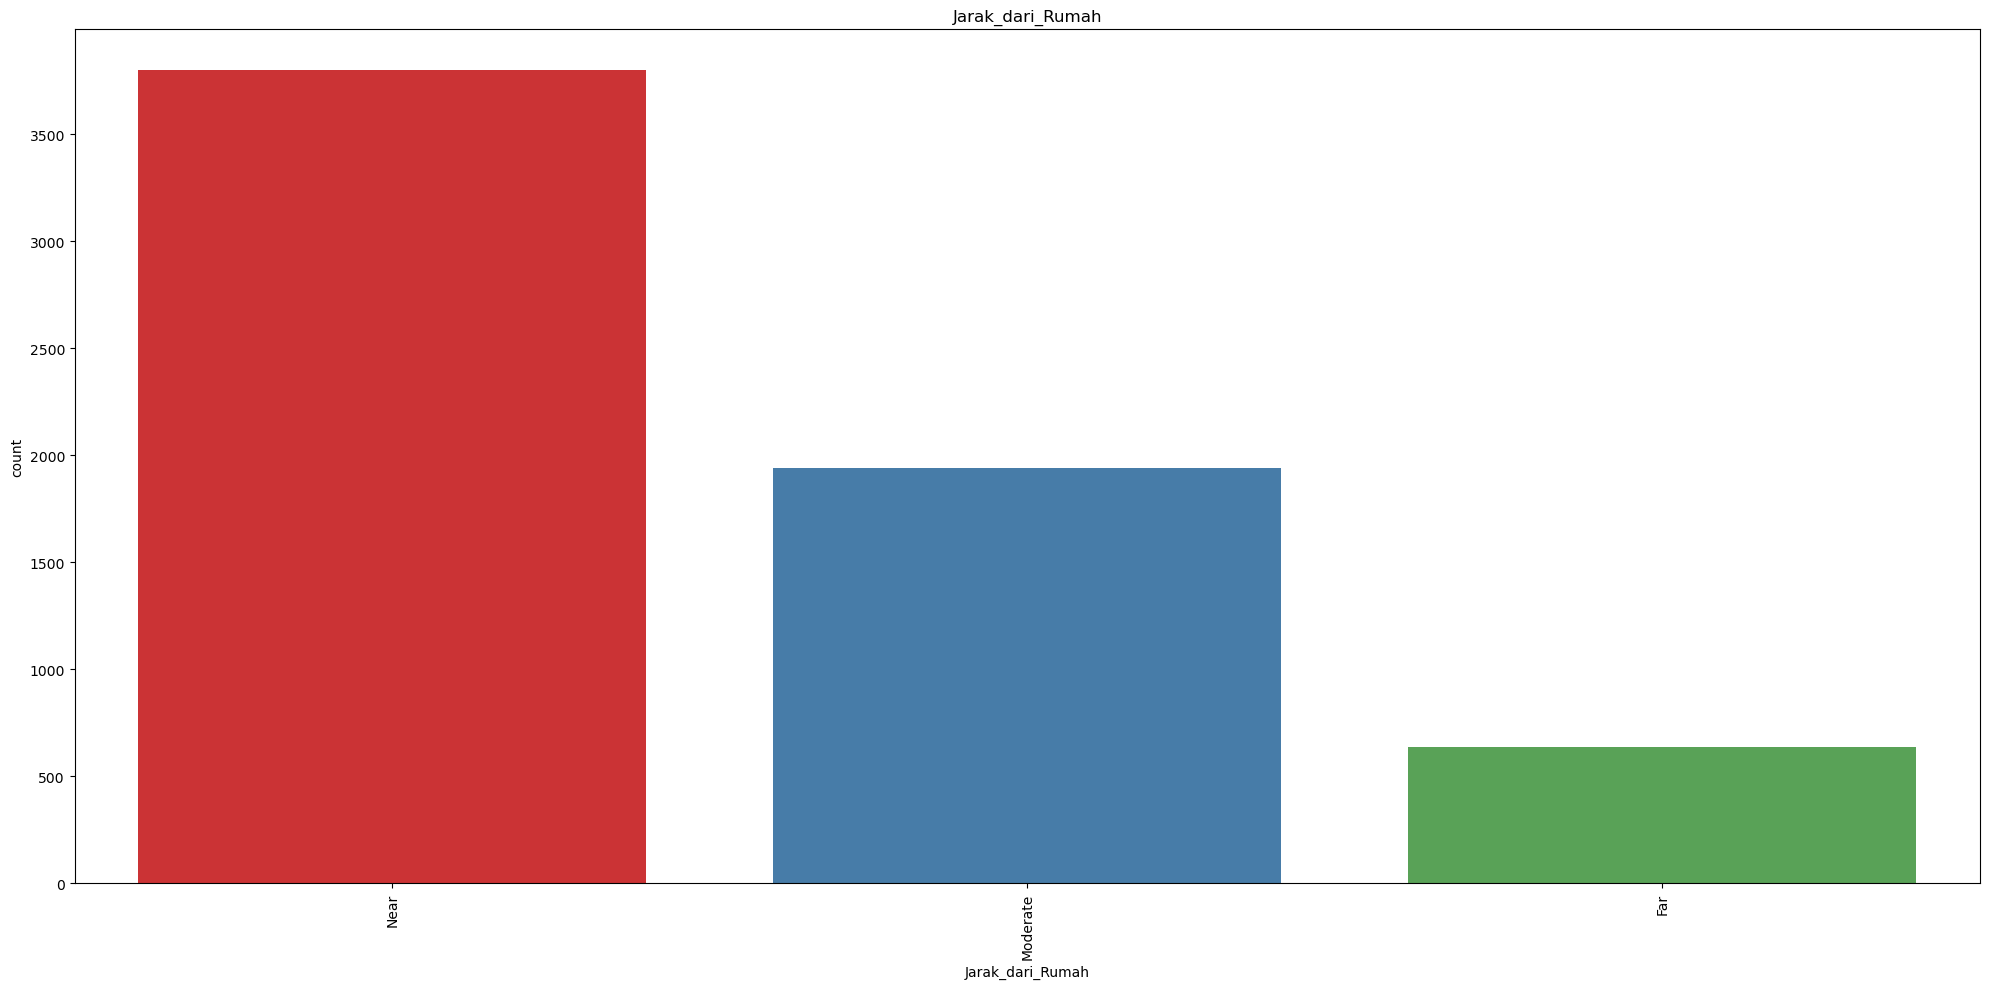

In [79]:
color_palette = sns.color_palette("Set1", len(cat_cols))
for i, column in enumerate(cat_cols, 1):
    if(column != 'Nama'):
        plt.figure(figsize=(20, 10))
        sns.countplot(data=df, x=column, palette=color_palette)
        plt.xticks(rotation=90)
        plt.title(column)
        plt.tight_layout()
        plt.show()

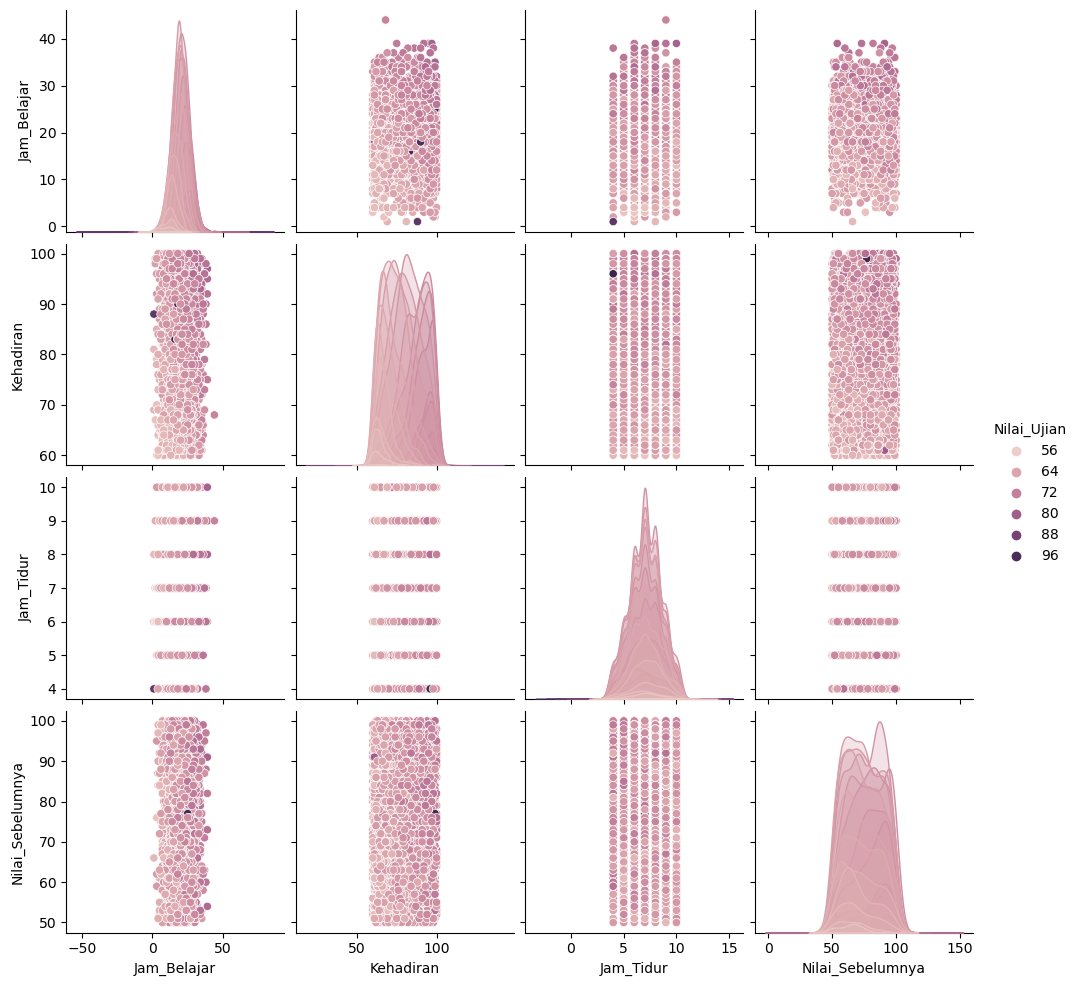

In [80]:
# Memilih fitur numerik dan kolom target untuk pairplot
features = ['Jam_Belajar', 'Kehadiran', 'Jam_Tidur', 'Nilai_Sebelumnya', 'Nilai_Ujian']
sns.pairplot(df[features], hue='Nilai_Ujian')

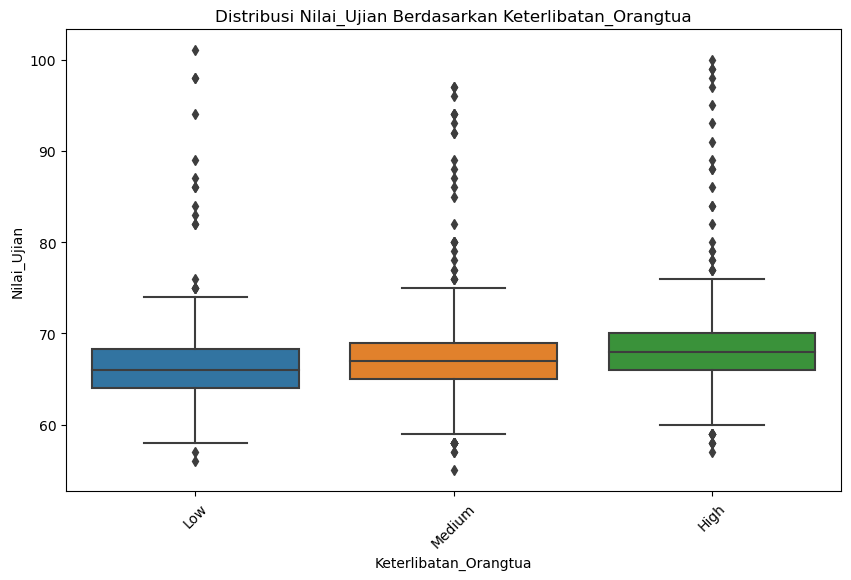

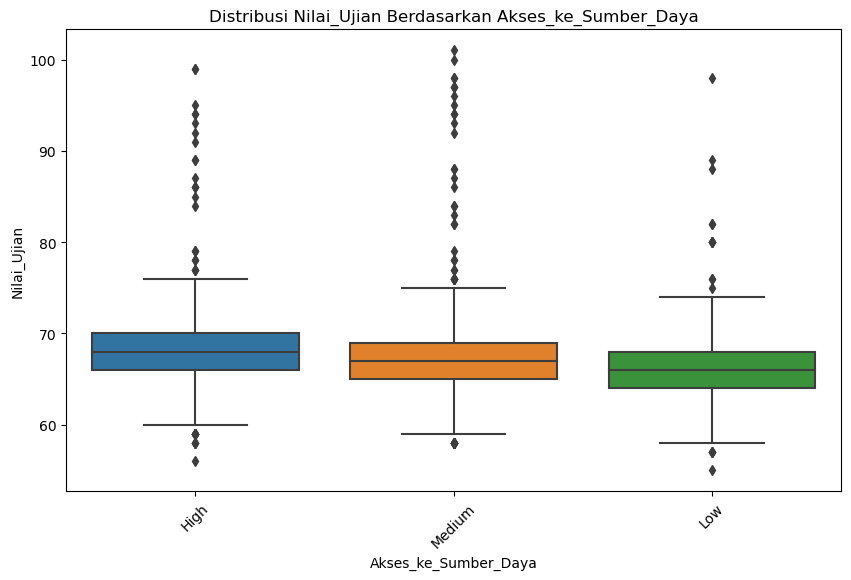

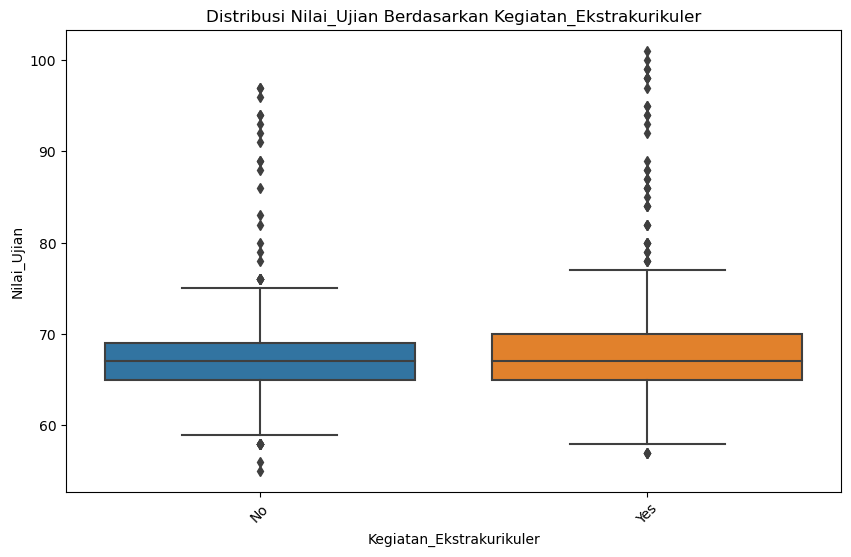

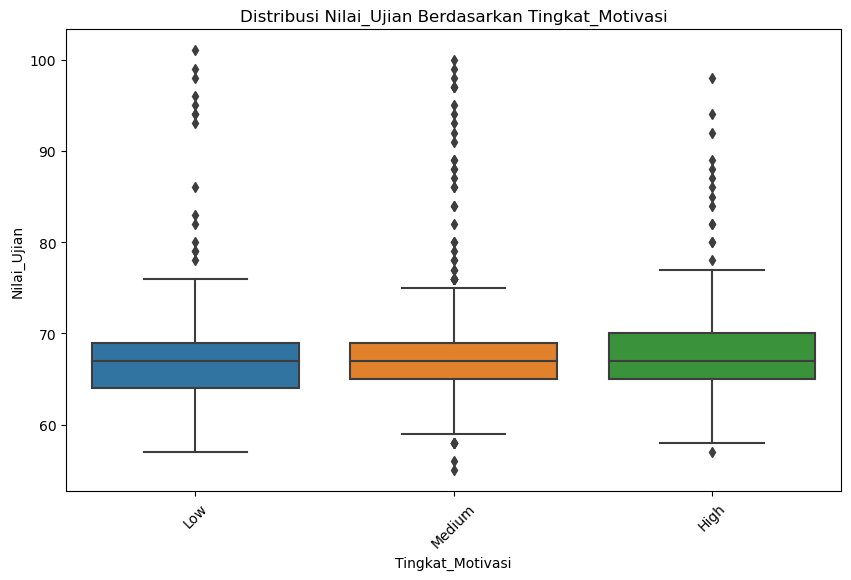

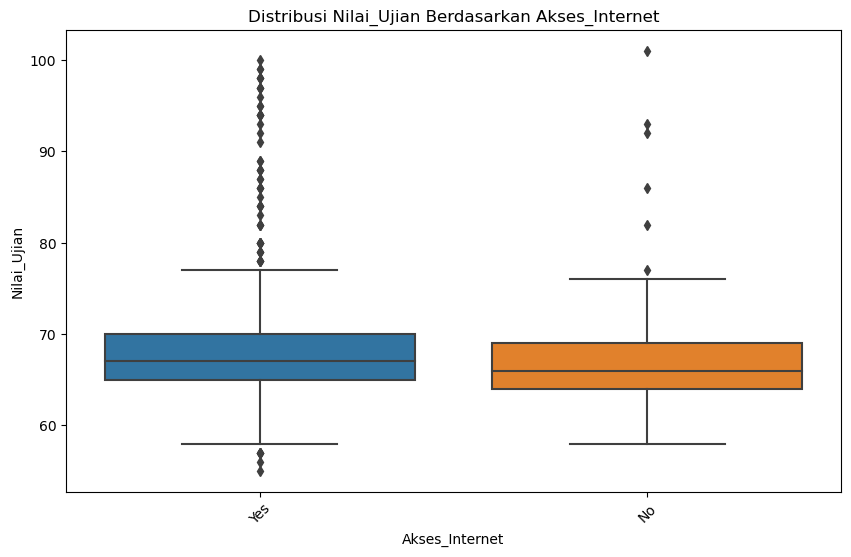

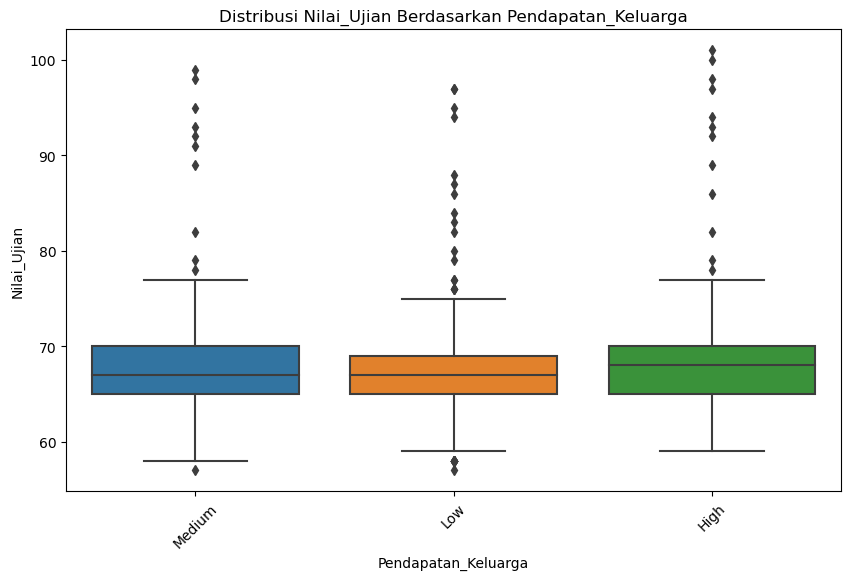

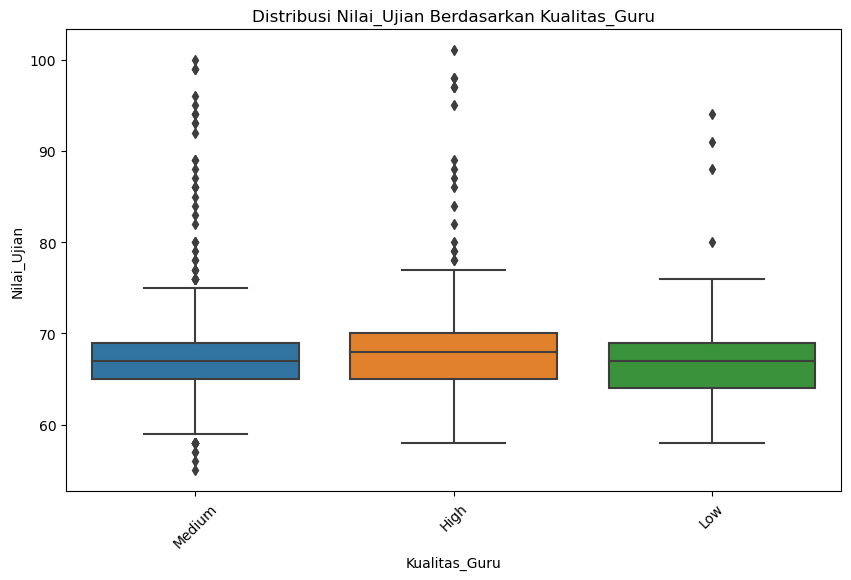

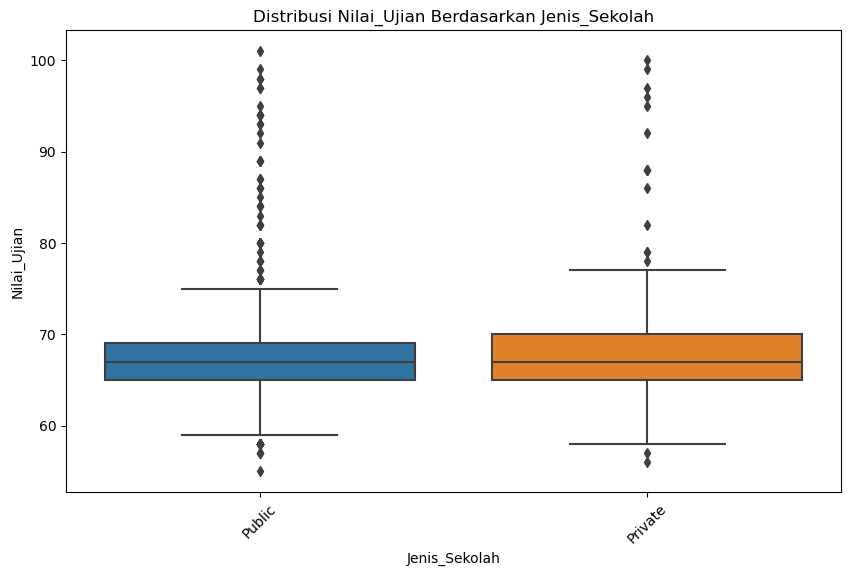

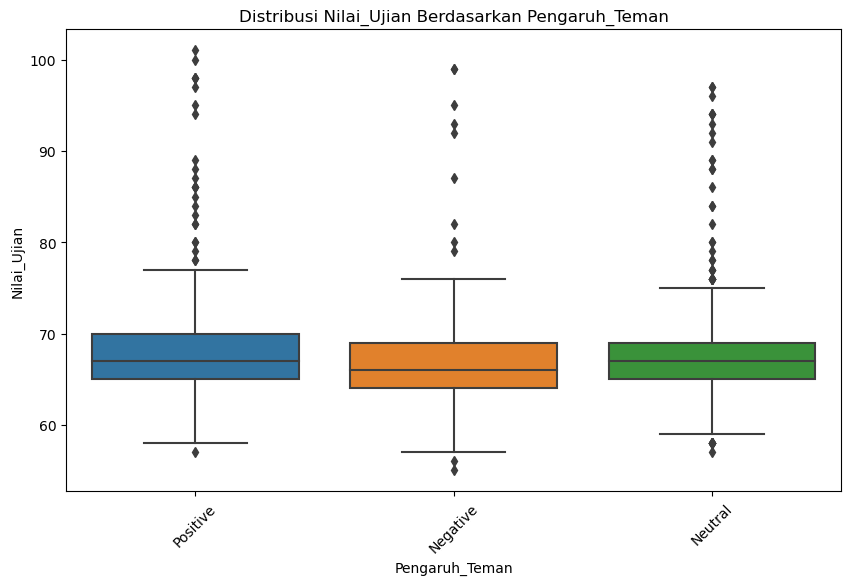

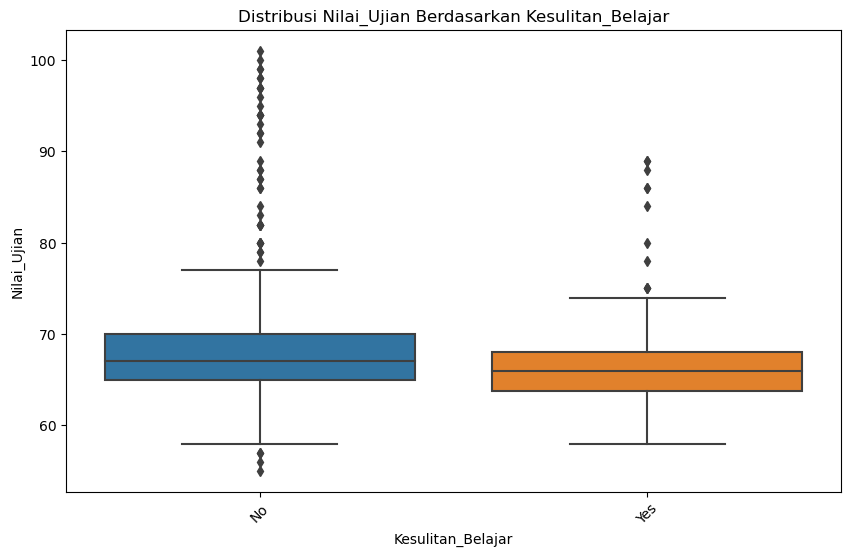

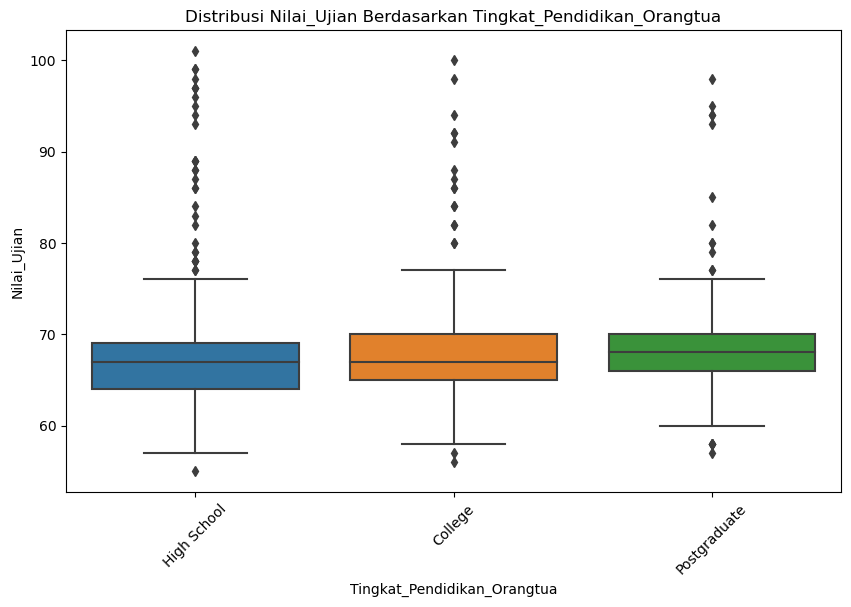

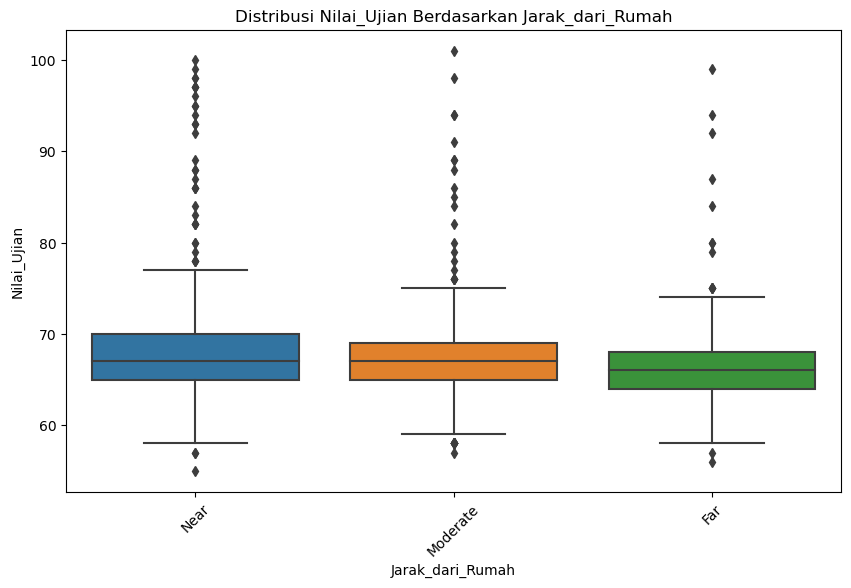

In [81]:


# Membuat box plot untuk melihat distribusi Nilai_Ujian berdasarkan setiap fitur kategorikal
for col in cat_cols:
    if(col != 'Nama'):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=col, y='Nilai_Ujian')
        plt.title(f'Distribusi Nilai_Ujian Berdasarkan {col}')
        plt.xticks(rotation=45)
        plt.show()

### Data Pre-Processing

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preProcessing(df: pd.DataFrame, mode="train"):
    # Removing Unimportant Column
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if mode == 'train':
        df.drop(columns=['Nama'], inplace=True, axis=1)
        cat_cols.remove('Nama')

    # Filling NaN values for categorical columns with mode
    for col in cat_cols:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

    # Filling NaN values for numerical columns with rounded mean
    for col in num_cols:
        mean_value = df[col].mean()
        mean_value_rounded = round(mean_value)
        df[col].fillna(mean_value_rounded, inplace=True)
        
    df_encoded = df.copy()

    # Encoding categorical columns
    label_encoder = LabelEncoder()
    for col in cat_cols:
        if col != 'Nama':
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        
    # Standardizing numerical columns
    scaler = StandardScaler()
    df_encoded_scaled = df_encoded.copy()
    
    if mode == 'train':
        numeric_cols = df_encoded_scaled.drop(columns=['Nilai_Ujian']).select_dtypes(include=['float64', 'int64', 'int32']).columns
    else:
        numeric_cols = df_encoded_scaled.select_dtypes(include=['float64', 'int64', 'int32']).columns

    df_encoded_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

    # Rounding scaled values to 2 decimal places
    df_encoded_scaled[numeric_cols] = df_encoded_scaled[numeric_cols].round(2)
    # Applying log transformation on scaled numerical columns (adding 1 to avoid log(0))
    # df_encoded_scaled[numeric_cols] = np.log1p(df_encoded_scaled[numeric_cols])

    # Rounding transformed values to 2 decimal places
    df_encoded_scaled[numeric_cols] = df_encoded_scaled[numeric_cols].round(2)

    return df_encoded_scaled


In [83]:
df_train_encoded_scaled= preProcessing(df)

In [84]:
df_test_encoded_scaled = preProcessing(df_test_predict,mode='test')

In [85]:
df_train_encoded_scaled.head()

,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Nilai_Ujian
0,0.00,0.36,-0.31,-1.4,-1.22,-0.02,-0.01,-0.39,0.29,-1.21,0.74,0.69,0.66,1.07,0.03,-0.32,0.14,0.75,67
1,-0.18,-0.00,-0.31,0.9,-1.22,0.68,-0.01,-0.39,0.29,0.41,0.74,0.69,0.66,-1.58,1.00,-0.32,-1.29,-0.74,61
2,0.73,1.63,0.86,0.9,0.82,-0.02,-0.01,0.88,0.29,0.41,0.74,0.69,0.66,-0.25,1.00,-0.32,1.58,0.75,74
3,1.63,0.81,-0.31,0.9,0.82,0.68,2.07,0.88,0.29,-0.40,0.74,0.69,0.66,-1.58,1.00,-0.32,0.14,-0.74,71
4,0.00,1.09,0.86,0.9,0.82,-0.72,-0.91,0.88,0.29,1.22,0.74,-1.61,0.66,-0.25,1.00,-0.32,-1.29,0.75,70


In [86]:
df_test_encoded_scaled.head()

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah
0,Ouzen (オーゼン),0.03,-0.27,0.87,-1.22,0.67,-0.03,-1.57,0.87,0.35,-0.38,-0.54,0.72,0.67,0.84,1.03,-0.29,0.21,0.78
1,"Yuigahama, Yui (由比ヶ浜 結衣)",1.40,1.29,0.87,0.97,0.67,0.71,0.32,0.87,0.35,-1.22,0.85,0.72,-1.49,-1.93,-1.01,-0.29,0.21,-0.82
2,Hiei (飛影),0.20,0.42,0.87,-1.22,0.67,-1.50,-1.57,0.87,0.35,0.47,-0.54,0.72,-1.49,-0.54,0.01,-0.29,-1.14,0.78
3,Dabi (荼毘),-0.66,0.60,-1.40,0.97,0.67,-0.03,0.25,0.87,0.35,-0.38,-0.54,0.72,0.67,-0.54,1.03,-0.29,1.56,-0.82
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",0.72,-0.01,-1.40,0.97,0.67,-0.03,-0.24,0.87,-2.88,0.47,0.85,0.72,0.67,-0.54,0.01,-0.29,0.21,0.78


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform

def train_and_predict(df_train, df_test, target_column='Nilai_Ujian'):
    # Memisahkan fitur dan target
    X = df_train.drop(target_column, axis=1)
    y = df_train[target_column]

    # Membagi data menjadi data latih dan data uji
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model regresi
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso()
    }

    # Menyediakan hyperparameter untuk Ridge dan Lasso
    param_grid = {
        'Ridge Regression': {
            'alpha': [0.1, 1.0, 10.0, 100.0]  # Rentang nilai alpha untuk Ridge
        },
        'Lasso Regression': {
            'alpha': [0.1, 1.0, 10.0, 100.0]  # Rentang nilai alpha untuk Lasso
        }
    }

    # Menyediakan parameter untuk RandomizedSearchCV
    random_param_dist = {
        'Ridge Regression': {
            'alpha': uniform(0.01, 100)  # Rentang alpha acak untuk Ridge
        },
        'Lasso Regression': {
            'alpha': uniform(0.01, 100)  # Rentang alpha acak untuk Lasso
        }
    }

    # Melatih dan mengevaluasi model regresi
    results = {}

    # Hyperparameter Tuning dengan GridSearchCV
    for model_name, model in models.items():
        if model_name in param_grid:
            grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_

            # Prediksi dan menghitung MSE pada data validasi
            y_pred_val = best_model.predict(X_val)
            val_mse = mean_squared_error(y_val, y_pred_val)

            results[model_name] = {
                'Best Parameters (GridSearch)': best_params,
                'Validation MSE (GridSearch)': val_mse
            }

    # Hyperparameter Tuning dengan RandomizedSearchCV
    for model_name, model in models.items():
        if model_name in random_param_dist:
            random_search = RandomizedSearchCV(model, random_param_dist[model_name], n_iter=300, cv=5, scoring='neg_mean_squared_error', random_state=42)
            random_search.fit(X_train, y_train)
            best_model_random = random_search.best_estimator_
            best_params_random = random_search.best_params_

            # Prediksi dan menghitung MSE pada data validasi
            y_pred_val_random = best_model_random.predict(X_val)
            val_mse_random = mean_squared_error(y_val, y_pred_val_random)

            results[f'{model_name} (RandomizedSearch)'] = {
                'Best Parameters (RandomizedSearch)': best_params_random,
                'Validation MSE (RandomizedSearch)': val_mse_random
            }

    # Menampilkan hasil evaluasi
    results_df = pd.DataFrame(results).T
    print(results_df)

    # Memprediksi hasil dari df_test dengan model terbaik (dari GridSearch)
    y_pred_test = best_model.predict(df_test.drop(columns=['Nama']))

    # Membuat DataFrame untuk hasil prediksi
    submission_df = pd.DataFrame({
        'Nama': df_test['Nama'],
        'Nilai_Ujian': y_pred_test.flatten()  # Mengubah hasil prediksi menjadi satu dimensi
    })

    # Mengembalikan DataFrame hasil prediksi
    return submission_df

# Contoh pemanggilan fungsi
# df_train_encoded_scaled = ... # DataFrame pelatihan Anda
# df_test_encoded_scaled = ...  # DataFrame pengujian Anda
# submission_df = train_and_predict(df_train_encoded_scaled, df_test_encoded_scaled)
# submission_df.to_csv('submission.csv', index=False)


In [93]:
submission_df = train_and_predict(df_train_encoded_scaled,df_test_encoded_scaled)

                                    Best Parameters (GridSearch)  \
Ridge Regression                                 {'alpha': 10.0}   
Lasso Regression                                  {'alpha': 0.1}   
Ridge Regression (RandomizedSearch)                          NaN   
Lasso Regression (RandomizedSearch)                          NaN   

                                    Validation MSE (GridSearch)  \
Ridge Regression                                        6.19594   
Lasso Regression                                        6.39689   
Ridge Regression (RandomizedSearch)                         NaN   
Lasso Regression (RandomizedSearch)                         NaN   

                                    Best Parameters (RandomizedSearch)  \
Ridge Regression                                                   NaN   
Lasso Regression                                                   NaN   
Ridge Regression (RandomizedSearch)      {'alpha': 19.534298779804452}   
Lasso Regression (Randomize

In [94]:
submission_df.head()

,Nama,Nilai_Ujian
0,Ouzen (オーゼン),66.573678
1,"Yuigahama, Yui (由比ヶ浜 結衣)",70.359721
2,Hiei (飛影),68.175660
3,Dabi (荼毘),67.337933
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",68.114576


In [ ]:
submission_df.to_csv('submission.csv', index=False)